In [247]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
import scipy.stats as st
import numpy as np
from statsmodels.stats.proportion import proportions_ztest # pip install statsmodels
from sklearn.preprocessing import StandardScaler

%matplotlib inline

from functions_Rosa import * 

In [248]:
df_final_demo = read_txt('../data/raw/df_final_demo.txt')
df_final_demo.head(3)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0


In [249]:
data_exploration(df_final_demo)

Number of rows: 70609
Number of columns: 9
Number of duplicates: 0

Numerical Columns: Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

Categorical Columns: Index(['gendr'], dtype='object')


,Column,Data Type,Non-Null Count,Missing Values,Unique Values
0,client_id,int64,70609,0,70609
1,clnt_tenure_yr,float64,70595,14,54
2,clnt_tenure_mnth,float64,70595,14,482
3,clnt_age,float64,70594,15,165
4,gendr,object,70595,14,4
5,num_accts,float64,70595,14,8
6,bal,float64,70595,14,70328
7,calls_6_mnth,float64,70595,14,8
8,logons_6_mnth,float64,70595,14,9


In [250]:
rename_columns = {
    "clnt_tenure_yr" : "tenure_year",
    "clnt_tenure_mnth": "tenure_month",
    "clnt_age": "age",
    "gendr" : "gender",
    "num_accts": "number_of_accounts",
    "bal" : "balance",
    "calls_6_mnth": "calls_6_month",
    "logons_6_mnth": "logons_6_month"
}

df_final_demo = df_final_demo.rename(columns = rename_columns)
df_final_demo

,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [251]:
df_final_experiment_clients = read_txt('../data/raw/df_final_experiment_clients.txt')
df_final_experiment_clients = df_final_experiment_clients.rename(columns = {"Variation":"variation"})
df_final_experiment_clients.head(3)

,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control


In [252]:
data_exploration(df_final_experiment_clients)

Number of rows: 70609
Number of columns: 2
Number of duplicates: 0

Numerical Columns: Index(['client_id'], dtype='object')

Categorical Columns: Index(['variation'], dtype='object')


,Column,Data Type,Non-Null Count,Missing Values,Unique Values
0,client_id,int64,70609,0,70609
1,variation,object,50500,20109,2


In [253]:
df_final_experiment_clients['variation'].unique()

array(['Test', 'Control', nan], dtype=object)

In [254]:
# Drop missing value in variation

df_final_experiment_clients.dropna(subset=["variation"], inplace=True)


Control Group = Clients interacted with Vanguard’s traditional online process.<br>
Test Group = Clients experienced the new, spruced-up digital interface.

In [255]:
df_final_web_data_pt_1 = read_txt('../data/raw/df_final_web_data_pt_1.txt')
df_final_web_data_pt_1.head(3)

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22


In [256]:
data_exploration(df_final_web_data_pt_1)

Number of rows: 343141
Number of columns: 5
Number of duplicates: 2095

Numerical Columns: Index(['client_id'], dtype='object')

Categorical Columns: Index(['visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')


,Column,Data Type,Non-Null Count,Missing Values,Unique Values
0,client_id,int64,343141,0,58391
1,visitor_id,object,343141,0,62936
2,visit_id,object,343141,0,75256
3,process_step,object,343141,0,5
4,date_time,object,343141,0,282666


In [257]:
df_final_web_data_pt_2 = read_txt('../data/raw/df_final_web_data_pt_2.txt')
df_final_web_data_pt_2.head(3)

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48


In [258]:
data_exploration(df_final_web_data_pt_2)

Number of rows: 412264
Number of columns: 5
Number of duplicates: 8669

Numerical Columns: Index(['client_id'], dtype='object')

Categorical Columns: Index(['visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')


,Column,Data Type,Non-Null Count,Missing Values,Unique Values
0,client_id,int64,412264,0,67430
1,visitor_id,object,412264,0,71042
2,visit_id,object,412264,0,82841
3,process_step,object,412264,0,5
4,date_time,object,412264,0,346697


### Merge Digital Footprints data

In [259]:
"Concat two dataframe in vertical mode"

df_final_web_data = pd.concat([df_final_web_data_pt_1, df_final_web_data_pt_2], axis=0)

In [260]:
df_final_web_data.head(3)

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22


## Data Cleaning

In [261]:
df_final_web_data.duplicated().sum()

10764

In [262]:
df_final_web_data = df_final_web_data.drop_duplicates()

In [263]:
df_final_web_data.duplicated().sum()

0

### Filling missing numerical data in df_final_demo with ‘mean’ and categorical_data with ‘mode’

In [264]:
# Select categorical and numerical columns
categorical_data = df_final_demo.select_dtypes(include=['object']).columns
numerical_data = df_final_demo.select_dtypes(include=['int64','float64']).columns

# Fill missing values in numerical columns with the mean
for column in numerical_data:
    df_final_demo[column] = df_final_demo[column].fillna(df_final_demo[column].mean())

# Fill missing values in categorical columns with the mode
for column in categorical_data:
    if not df_final_demo[column].mode().empty:  # Check if mode exists
        df_final_demo[column] = df_final_demo[column].fillna(df_final_demo[column].mode()[0])

In [265]:
# Check missing values

df_final_demo.isnull().sum()

client_id             0
tenure_year           0
tenure_month          0
age                   0
gender                0
number_of_accounts    0
balance               0
calls_6_month         0
logons_6_month        0
dtype: int64

### Change data type of number_of_accounts, calls_6_month, and logons_6_month into integer


In [266]:
df_final_demo["number_of_accounts"] = df_final_demo["number_of_accounts"].astype("int64")
df_final_demo["calls_6_month"] = df_final_demo["calls_6_month"].astype("int64")
df_final_demo["logons_6_month"] = df_final_demo["logons_6_month"].astype("int64")

In [267]:
df_final_demo.dtypes

client_id               int64
tenure_year           float64
tenure_month          float64
age                   float64
gender                 object
number_of_accounts      int64
balance               float64
calls_6_month           int64
logons_6_month          int64
dtype: object

### Drop missing values in df_final_experiment_clients

In [268]:
df_final_experiment_clients = df_final_experiment_clients.dropna()

In [269]:
# Recheck missing values
df_final_experiment_clients.isnull().sum()

client_id    0
variation    0
dtype: int64

In [270]:
df_final_demo["logons_6_month"]

0        9
1        9
2        9
3        6
4        3
        ..
70604    5
70605    6
70606    3
70607    4
70608    7
Name: logons_6_month, Length: 70609, dtype: int64

## Export the clean dataframes as new csv files

In [271]:
df_final_demo.to_csv('../data/cleaned/df_final_demo_cleaned.csv', index=False)
df_final_experiment_clients.to_csv('../data/cleaned/df_final_experiment_clients_cleaned.csv', index=False)
df_final_web_data.to_csv('../data/cleaned/df_final_web_data_cleaned.csv', index=False)

# Analysis: Primary clients who use the online process

In [272]:
df_final_demo_cleaned = pd.read_csv('../data/cleaned/df_final_demo_cleaned.csv')
df_final_experiment_clients_cleaned = pd.read_csv('../data/cleaned/df_final_experiment_clients_cleaned.csv')
df_final_web_data_cleaned = pd.read_csv('../data/cleaned/df_final_web_data_cleaned.csv')

## 1. Univariate analysis

### 1.1. Categorical

In [273]:
def univariate_categorical(df):

    # check the frequency 
    frequency_table = df.value_counts()

    # visualization
    
    sns.barplot(x=frequency_table.index, y=frequency_table.values, palette='viridis')
    plt.title('Visualization of The Distribution')
    plt.xticks(ha='right')
    plt.show()

#### Gender

In [274]:
df_final_demo_cleaned["gender"].value_counts()

gender
U    24136
M    23724
F    22746
X        3
Name: count, dtype: int64

U = unknown/unspecified --> it could be that the user doesn't want to disclose the gender. <br>
X = non-binary or other genders that don't conform to the traditional male/female binary

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_9644\1922417502.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




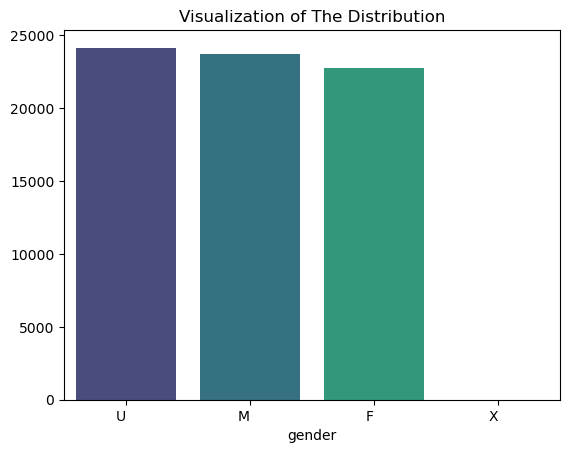

In [275]:
gender = df_final_demo_cleaned["gender"]
univariate_categorical(gender)

### 1.2. Numerical

#### Age

In [276]:
def univariate_numerical(df):

    # Measure of centrality
    mean = round(df.mean(),2)
    median = round(df.median(),2)
    mode = round(df.mode()[0],2)

    # Measure of dispersion
    variance = round(df.var(),2)
    std_dev = round(df.std(),2)
    min_value = df.min()
    max_value = df.max()
    range_value = max_value - min_value
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    quantiles = df.quantile([0.25, 0.5, 0.75])

    # Shape of distribution
    skewness = round(df.skew(),2)
    kurtosis = round(df.kurtosis(),2)

    summary_df = pd.DataFrame({
        'Metric': ['Mean', 'Median', 'Mode', 'Variance', 'Standard Deviation', 'Min Value', 'Max Value', 'Range', 'Interquartile Range', 'Skewness', 'Kurtosis'],
        'Value': [mean, median, mode, variance, std_dev, min_value, max_value, range_value, IQR, skewness, kurtosis]
    })


    # Visualization

    # Histogram plot
    plt.subplot(2, 1, 1)
    sns.histplot(df, kde=True, bins=20, color="skyblue")
    plt.title('Histogram plot')

    # Box plot
    plt.subplot(2, 1, 2)
    sns.boxplot(data = df, color="skyblue")
    plt.title('Box Plot')

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5)  # Adjust the space between plots

    plt.show()
    
    return summary_df

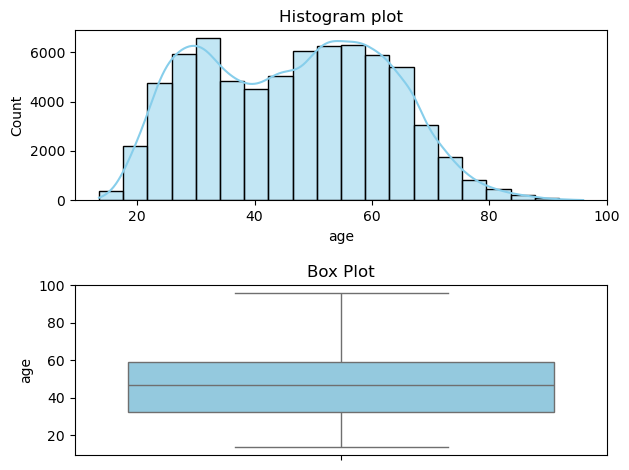

,Metric,Value
0,Mean,46.44
1,Median,47.00
2,Mode,58.50
3,Variance,243.04
4,Standard Deviation,15.59
5,Min Value,13.50
6,Max Value,96.00
7,Range,82.50
8,Interquartile Range,26.50
9,Skewness,0.08


In [277]:
age = df_final_demo_cleaned["age"]
univariate_numerical(age)

In [278]:
# # Create subplots
# fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
#                     vertical_spacing=0.02, 
#                     row_heights=[0.2, 0.8])

# # Add box plot
# fig.add_trace(
#     px.box(df_final_demo_cleaned, x='age').data[0],
#     row=1, col=1
# )

# # Add histogram
# fig.add_trace(
#     px.histogram(df_final_demo_cleaned, x='age').data[0],
#     row=2, col=1
# )

# fig.update_layout(height=600, width=800, title_text="Age Distribution",
#                   showlegend=False)
# fig.show()

In [279]:
data_exploration(df_final_demo_cleaned)

Number of rows: 70609
Number of columns: 9
Number of duplicates: 0

Numerical Columns: Index(['client_id', 'tenure_year', 'tenure_month', 'age', 'number_of_accounts',
       'balance', 'calls_6_month', 'logons_6_month'],
      dtype='object')

Categorical Columns: Index(['gender'], dtype='object')


,Column,Data Type,Non-Null Count,Missing Values,Unique Values
0,client_id,int64,70609,0,70609
1,tenure_year,float64,70609,0,55
2,tenure_month,float64,70609,0,483
3,age,float64,70609,0,166
4,gender,object,70609,0,4
5,number_of_accounts,int64,70609,0,8
6,balance,float64,70609,0,70328
7,calls_6_month,int64,70609,0,8
8,logons_6_month,int64,70609,0,9


In [280]:
# # Create subplots
# fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
#                     vertical_spacing=0.02, 
#                     row_heights=[0.2, 0.8])

# # Add box plot
# fig.add_trace(
#     px.box(df_final_demo_cleaned, x='tenure_year').data[0],
#     row=1, col=1
# )

# # Add histogram
# fig.add_trace(
#     px.histogram(df_final_demo_cleaned, x='tenure_year').data[0],
#     row=2, col=1
# )

# fig.update_layout(height=600, width=800, title_text="Tenure Year Distribution",
#                   showlegend=False)
# fig.show()

In [281]:
# # Create subplots
# fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
#                     vertical_spacing=0.02, 
#                     row_heights=[0.2, 0.8])

# # Add box plot
# fig.add_trace(
#     px.box(df_final_demo_cleaned, x='tenure_month').data[0],
#     row=1, col=1
# )

# # Add histogram
# fig.add_trace(
#     px.histogram(df_final_demo_cleaned, x='tenure_month').data[0],
#     row=2, col=1
# )

# fig.update_layout(height=600, width=800, title_text="Tenure Month Distribution",
#                   showlegend=False)
# fig.show()

In [282]:
# # Create subplots
# fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
#                     vertical_spacing=0.02, 
#                     row_heights=[0.2, 0.8])

# # Add box plot
# fig.add_trace(
#     px.box(df_final_demo_cleaned, x='number_of_accounts').data[0],
#     row=1, col=1
# )

# # Add histogram
# fig.add_trace(
#     px.histogram(df_final_demo_cleaned, x='number_of_accounts').data[0],
#     row=2, col=1
# )

# fig.update_layout(height=600, width=800, title_text="Number of Accounts Distribution",
#                   showlegend=False)
# fig.show()

In [283]:
# # Create subplots
# fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
#                     vertical_spacing=0.02, 
#                     row_heights=[0.2, 0.8])

# # Add box plot
# fig.add_trace(
#     px.box(df_final_demo_cleaned, x='balance').data[0],
#     row=1, col=1
# )

# # Add histogram
# fig.add_trace(
#     px.histogram(df_final_demo_cleaned, x='balance').data[0],
#     row=2, col=1
# )

# fig.update_layout(height=600, width=800, title_text="Balance Distribution",
#                   showlegend=False)
# fig.show()

In [284]:
# # Create subplots
# fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
#                     vertical_spacing=0.02, 
#                     row_heights=[0.2, 0.8])

# # Add box plot
# fig.add_trace(
#     px.box(df_final_demo_cleaned, x='calls_6_month').data[0],
#     row=1, col=1
# )

# # Add histogram
# fig.add_trace(
#     px.histogram(df_final_demo_cleaned, x='calls_6_month').data[0],
#     row=2, col=1
# )

# fig.update_layout(height=600, width=800, title_text="Number of calls in the past 6 month Distribution",
#                   showlegend=False)
# fig.show()

In [285]:
# # Create subplots
# fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
#                     vertical_spacing=0.02, 
#                     row_heights=[0.2, 0.8])

# # Add box plot
# fig.add_trace(
#     px.box(df_final_demo_cleaned, x='logons_6_month').data[0],
#     row=1, col=1
# )

# # Add histogram
# fig.add_trace(
#     px.histogram(df_final_demo_cleaned, x='logons_6_month').data[0],
#     row=2, col=1
# )

# fig.update_layout(height=600, width=800, title_text="Number of Logons in the past 6 months Distribution",
#                   showlegend=False)
# fig.show()

In [286]:
# Discretizing 'age' into 4 categories
bins = [12, 19, 39, 59, 100]
labels = ['Teenagers', 'Young Adults', 'Adults', 'Seniors']
df_final_demo_cleaned['age_group'] = pd.cut(df_final_demo_cleaned['age'], bins=bins, labels=labels, include_lowest=True)

df_final_demo_cleaned

,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,age_group
0,836976,6.0,73.0,60.5,U,2,45105.30,6,9,Seniors
1,2304905,7.0,94.0,58.0,U,2,110860.30,6,9,Adults
2,1439522,5.0,64.0,32.0,U,2,52467.79,6,9,Young Adults
3,1562045,16.0,198.0,49.0,M,2,67454.65,3,6,Adults
4,5126305,12.0,145.0,33.0,F,2,103671.75,0,3,Young Adults
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3,1411062.68,5,5,Young Adults
70605,8981690,12.0,148.0,31.0,M,2,101867.07,6,6,Young Adults
70606,333913,16.0,198.0,61.5,F,2,40745.00,3,3,Seniors
70607,1573142,21.0,255.0,68.0,M,3,475114.69,4,4,Seniors


In [287]:

df_final_demo_cleaned['tenure_type'] = df_final_demo_cleaned['tenure_year'].apply(lambda row: 'long-standing' if row > 10 else 'new')
df_final_demo_cleaned

,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,age_group,tenure_type
0,836976,6.0,73.0,60.5,U,2,45105.30,6,9,Seniors,new
1,2304905,7.0,94.0,58.0,U,2,110860.30,6,9,Adults,new
2,1439522,5.0,64.0,32.0,U,2,52467.79,6,9,Young Adults,new
3,1562045,16.0,198.0,49.0,M,2,67454.65,3,6,Adults,long-standing
4,5126305,12.0,145.0,33.0,F,2,103671.75,0,3,Young Adults,long-standing
...,...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3,1411062.68,5,5,Young Adults,new
70605,8981690,12.0,148.0,31.0,M,2,101867.07,6,6,Young Adults,long-standing
70606,333913,16.0,198.0,61.5,F,2,40745.00,3,3,Seniors,long-standing
70607,1573142,21.0,255.0,68.0,M,3,475114.69,4,4,Seniors,long-standing


In [288]:
df_final_demo_cleaned["age_group"].value_counts()

age_group
Adults          27785
Young Adults    24842
Seniors         17026
Teenagers         956
Name: count, dtype: int64

The primary clients are adults, followed by young adults, seniors, and teenagers.

#### Tenure year

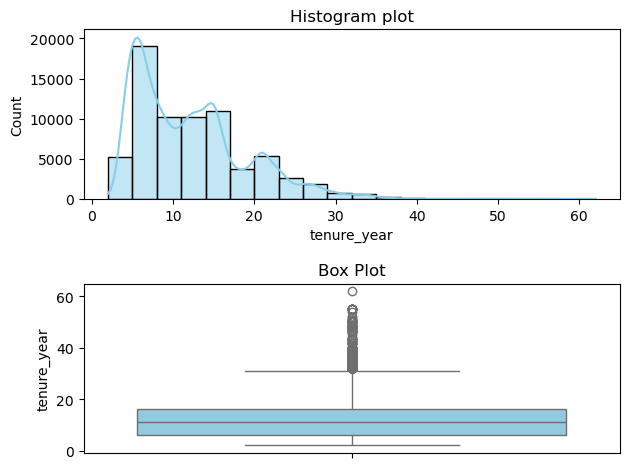

,Metric,Value
0,Mean,12.05
1,Median,11.00
2,Mode,6.00
3,Variance,47.21
4,Standard Deviation,6.87
5,Min Value,2.00
6,Max Value,62.00
7,Range,60.00
8,Interquartile Range,10.00
9,Skewness,1.04


In [289]:
tenure_year = df_final_demo_cleaned["tenure_year"]
univariate_numerical(tenure_year)

## 2. Bivariate analysis

In [290]:
df_numerical = df_final_demo_cleaned.select_dtypes("number").drop('client_id', axis=1, errors='ignore')

# Calculating the Spearman correlation coefficients between 'age' and all other numerical variables
spearman_correlations = df_numerical.corrwith(df_final_demo_cleaned['age'], method='spearman')

# Sorting the correlations for better visualization
spearman_correlations_sorted = spearman_correlations.sort_values(ascending=False)

# Displaying the correlations
spearman_correlations_sorted

age                   1.000000
balance               0.343027
tenure_month          0.301512
tenure_year           0.300965
logons_6_month        0.082634
calls_6_month         0.026743
number_of_accounts   -0.025885
dtype: float64

In [291]:
# Calculating the Spearman correlation coefficients between 'age' and all other numerical variables
pearson_correlations = df_numerical.corrwith(df_final_demo_cleaned['age'])

# Sorting the correlations for better visualization
pearson_correlations_sorted = pearson_correlations.sort_values(ascending=False)

# Displaying the correlations
pearson_correlations_sorted

age                   1.000000
tenure_month          0.309674
tenure_year           0.309372
balance               0.209549
logons_6_month        0.084682
calls_6_month         0.026734
number_of_accounts   -0.017689
dtype: float64

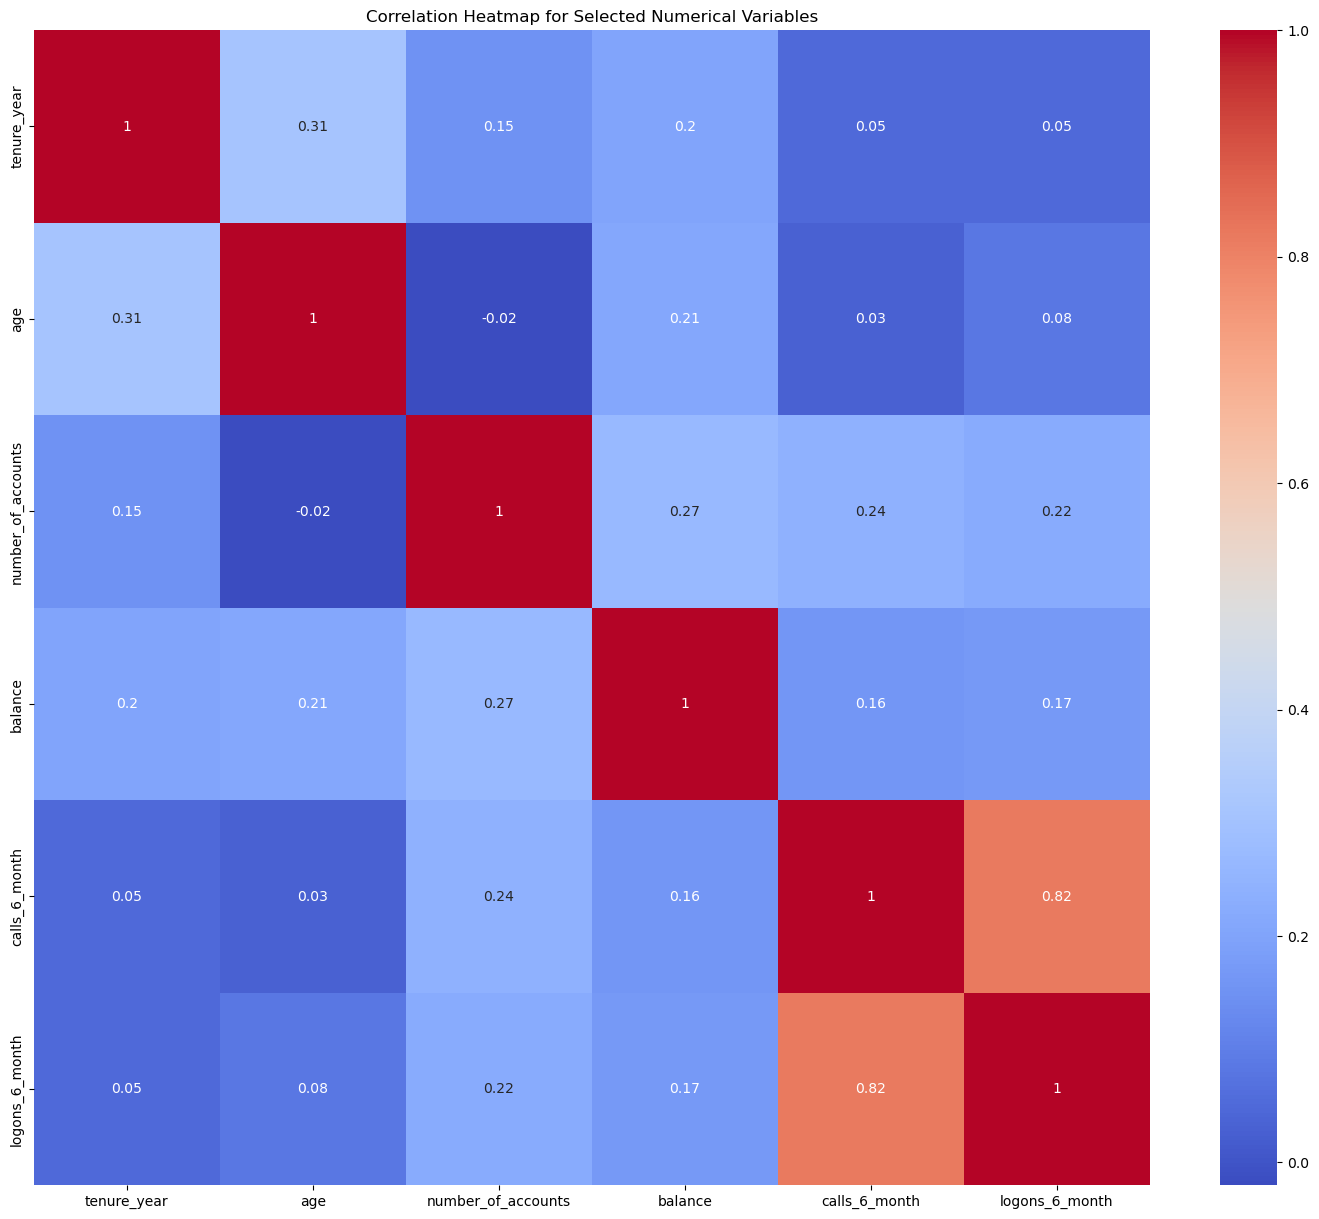

In [292]:
correlation_matrix = df_numerical.drop('tenure_month', axis=1, errors='ignore').corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(round(correlation_matrix,2), annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

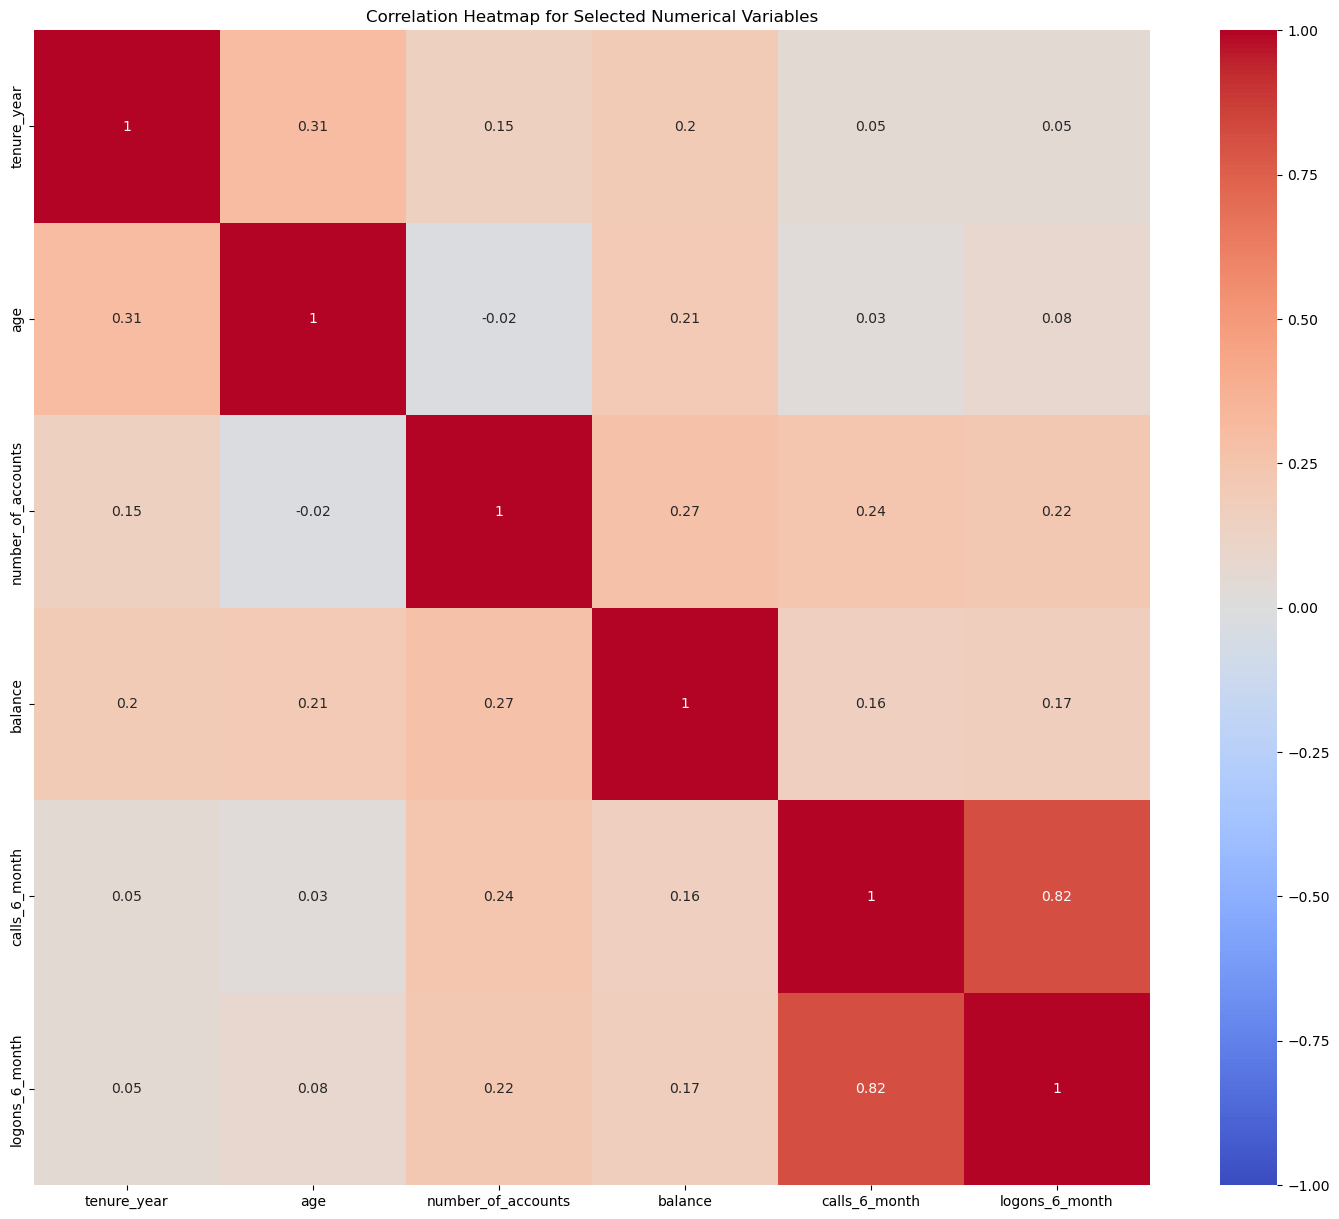

In [293]:
correlation_matrix = df_numerical.drop('tenure_month', axis=1, errors='ignore').corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(round(correlation_matrix,2), annot=True, cmap="coolwarm", vmin=-1, vmax=1)

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

In [294]:
fig = px.imshow(round(correlation_matrix,2), text_auto=True)
fig.show()

### Statistical tests

#### Number of accounts vs logons within 6 months

<Axes: xlabel='number_of_accounts', ylabel='count'>

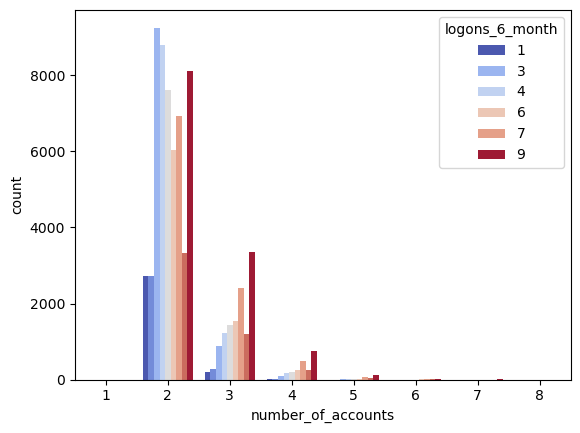

In [295]:
sns.countplot(data=df_final_demo_cleaned, x='number_of_accounts', hue='logons_6_month', palette='coolwarm')

## KPI analysis

In [296]:
df_final_demo_cleaned.head(3)

,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,age_group,tenure_type
0,836976,6.0,73.0,60.5,U,2,45105.30,6,9,Seniors,new
1,2304905,7.0,94.0,58.0,U,2,110860.30,6,9,Adults,new
2,1439522,5.0,64.0,32.0,U,2,52467.79,6,9,Young Adults,new


In [297]:
df_final_experiment_clients_cleaned.head(3)

,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control


In [298]:
df_final_web_data_cleaned.head(3)

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22


### Completion rate based on Visit_id

#### Try to do analysis based on the ratio between confirm/total visit

In [299]:
df_main = main_df_hypothesis_1(df_final_demo_cleaned, df_final_experiment_clients_cleaned, df_final_web_data_cleaned, 'client_id')

In [300]:
df_main.tail(10)

,client_id,tenure_year,age,gender,age_group,tenure_type,variation,visitor_id,visit_id,date,month,step_check
69551,4079649,23.0,62.5,M,Seniors,long-standing,Control,135423080_71753269572,155993046_1538887816_806756,2017-04-10,April,confirm
69552,1780858,21.0,68.5,M,Seniors,long-standing,Test,615559472_29670943967,600689000_53802784285_47549,2017-04-05,April,confirm
69553,1780858,21.0,68.5,M,Seniors,long-standing,Test,615559472_29670943967,227307749_26909896805_820354,2017-04-05,April,no_confirm
69554,6967120,21.0,68.5,M,Seniors,long-standing,Control,663474827_38847225720,923772865_74694577233_449836,2017-04-12,April,confirm
69555,5826160,20.0,56.5,F,Adults,long-standing,Test,903851930_50402388184,842608317_42559400580_37328,2017-04-05,April,confirm
69556,5826160,20.0,56.5,F,Adults,long-standing,Test,903851930_50402388184,61772393_69755892600_710588,2017-04-19,April,confirm
69557,5826160,20.0,56.5,F,Adults,long-standing,Test,69579557_2827236069,268191173_38958330991_849725,2017-05-03,May,confirm
69558,8739285,19.0,69.5,F,Seniors,long-standing,Test,8756552_54841419737,101846948_96925910026_299041,2017-04-12,April,confirm
69559,7468138,18.0,61.0,F,Seniors,long-standing,Test,317123960_46820919455,769876461_30381166055_830233,2017-03-30,March,no_confirm
69560,7468138,18.0,61.0,F,Seniors,long-standing,Test,317123960_46820919455,769876461_30381166055_830233,2017-03-31,March,no_confirm


In [301]:
df_control = df_control_general(df_main)
df_control

step_check,variation,date,month,confirm,no_confirm
0,Control,2017-03-15,March,77,44
1,Control,2017-03-16,March,23,24
2,Control,2017-03-17,March,10,14
3,Control,2017-03-18,March,10,17
4,Control,2017-03-19,March,14,14
...,...,...,...,...,...
93,Control,2017-06-16,June,53,67
94,Control,2017-06-17,June,57,54
95,Control,2017-06-18,June,105,68
96,Control,2017-06-19,June,101,85


In [302]:
df_control['confirm_ratio'] = round(df_control['confirm']/(df_control['confirm'] + df_control['no_confirm']),2)

df_control

step_check,variation,date,month,confirm,no_confirm,confirm_ratio
0,Control,2017-03-15,March,77,44,0.64
1,Control,2017-03-16,March,23,24,0.49
2,Control,2017-03-17,March,10,14,0.42
3,Control,2017-03-18,March,10,17,0.37
4,Control,2017-03-19,March,14,14,0.50
...,...,...,...,...,...,...
93,Control,2017-06-16,June,53,67,0.44
94,Control,2017-06-17,June,57,54,0.51
95,Control,2017-06-18,June,105,68,0.61
96,Control,2017-06-19,June,101,85,0.54


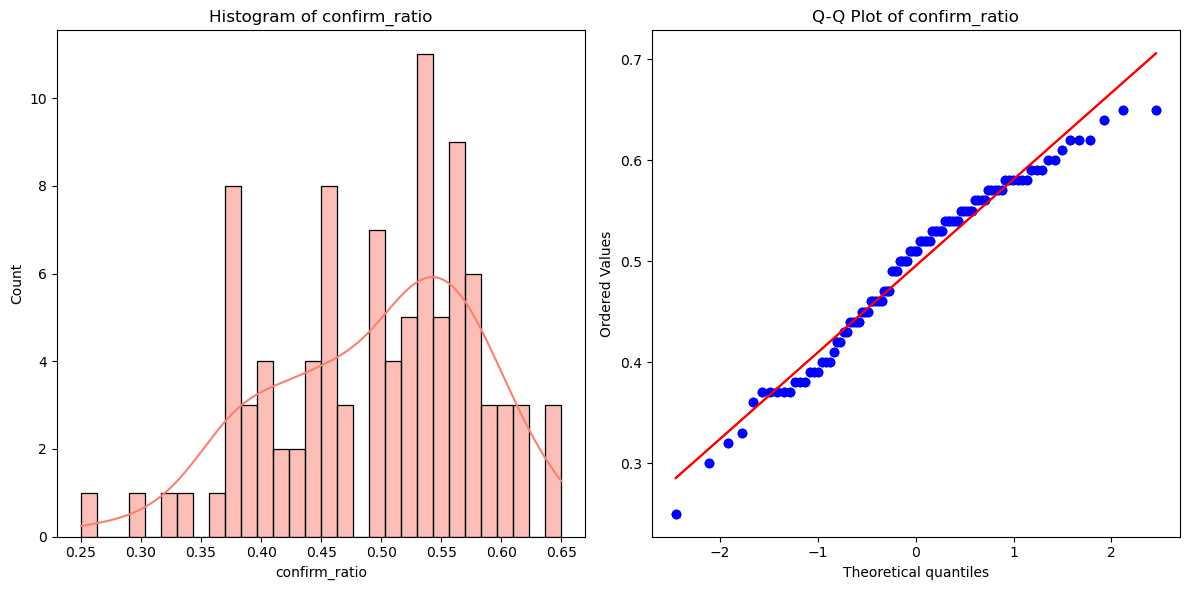

The test results indicate that the distribution is not significantly different from a normal distribution.


In [303]:
normality_check(df_control, 'confirm_ratio')

In [304]:
df_test = df_test_general(df_main)
df_test

step_check,variation,date,month,confirm,no_confirm
0,Test,2017-03-15,March,87,59
1,Test,2017-03-16,March,35,21
2,Test,2017-03-17,March,20,14
3,Test,2017-03-18,March,20,10
4,Test,2017-03-19,March,16,15
...,...,...,...,...,...
93,Test,2017-06-16,June,50,45
94,Test,2017-06-17,June,41,31
95,Test,2017-06-18,June,72,61
96,Test,2017-06-19,June,95,70


In [305]:
df_test['confirm_ratio'] = round(df_test['confirm']/(df_test['confirm'] + df_test['no_confirm']),2)

df_test

step_check,variation,date,month,confirm,no_confirm,confirm_ratio
0,Test,2017-03-15,March,87,59,0.60
1,Test,2017-03-16,March,35,21,0.62
2,Test,2017-03-17,March,20,14,0.59
3,Test,2017-03-18,March,20,10,0.67
4,Test,2017-03-19,March,16,15,0.52
...,...,...,...,...,...,...
93,Test,2017-06-16,June,50,45,0.53
94,Test,2017-06-17,June,41,31,0.57
95,Test,2017-06-18,June,72,61,0.54
96,Test,2017-06-19,June,95,70,0.58


In [342]:
df_control_2 = df_control
df_control_2['total_visits'] = df_control_2['confirm'] + df_control_2['no_confirm']
df_control_2.head()


step_check,variation,date,month,confirm,no_confirm,confirm_ratio,total_visits
0,Control,2017-03-15,March,77,44,0.64,121
1,Control,2017-03-16,March,23,24,0.49,47
2,Control,2017-03-17,March,10,14,0.42,24
3,Control,2017-03-18,March,10,17,0.37,27
4,Control,2017-03-19,March,14,14,0.50,28


In [338]:
df_test_2 = df_test
df_test_2['total_visits'] = df_test_2['confirm'] + df_test_2['no_confirm']
df_test_2.head()

step_check,variation,date,month,confirm,no_confirm,confirm_ratio,total_visits
0,Test,2017-03-15,March,87,59,0.60,146
1,Test,2017-03-16,March,35,21,0.62,56
2,Test,2017-03-17,March,20,14,0.59,34
3,Test,2017-03-18,March,20,10,0.67,30
4,Test,2017-03-19,March,16,15,0.52,31


In [343]:
df_main.head()

,client_id,tenure_year,age,gender,age_group,tenure_type,variation,visitor_id,visit_id,date,month,step_check
0,836976,6.0,60.5,U,Seniors,new,Test,427070339_1413275162,228976764_46825473280_96584,2017-04-02,April,confirm
1,836976,6.0,60.5,U,Seniors,new,Test,427070339_1413275162,104438405_2368283624_817211,2017-03-29,March,no_confirm
2,2304905,7.0,58.0,U,Adults,new,Control,336210275_56978226960,724930510_65323235593_692754,2017-05-21,May,confirm
3,1439522,5.0,32.0,U,Young Adults,new,Test,245908175_84333642537,898099666_87299892721_263146,2017-04-06,April,no_confirm
4,1439522,5.0,32.0,U,Young Adults,new,Test,407067363_48226131468,968288276_7230824336_666089,2017-04-07,April,no_confirm


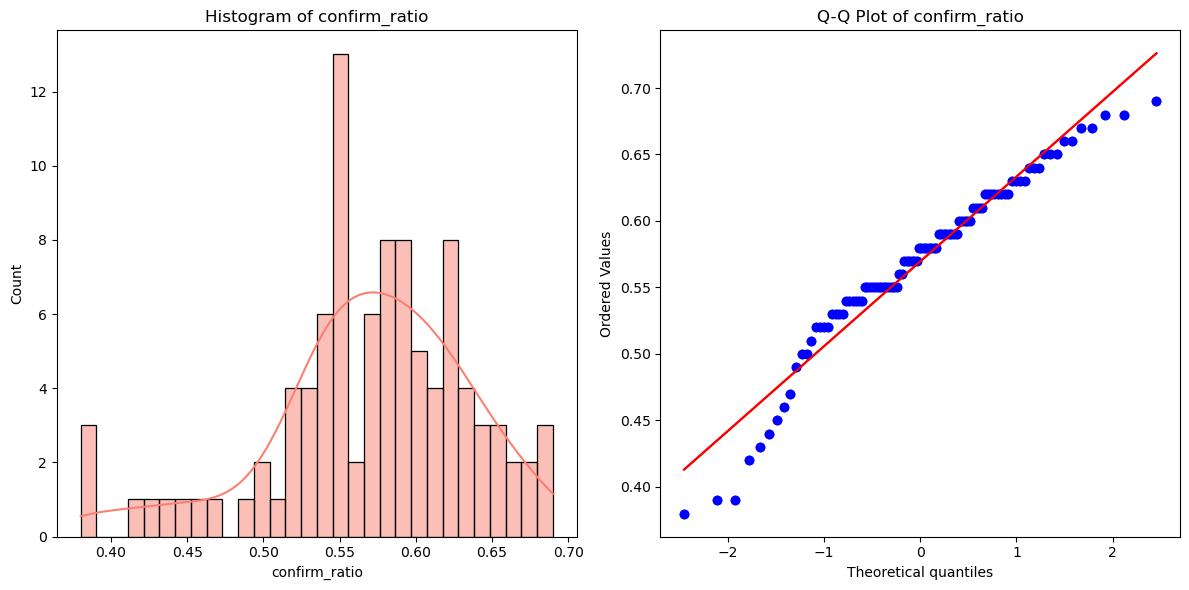

The test results indicate that the distribution is not significantly different from a normal distribution.


In [306]:
normality_check(df_test, 'confirm_ratio')

### Hypothesis Testing

In [312]:
hypothesis_testing(df_test, 'confirm_ratio', df_control, 'confirm_ratio', 0.05)

pvalue is 0.9999999999556463
Reject null hypothesis.


In [237]:
fig = go.Figure()

# Add line plot for Control group
fig.add_trace(go.Scatter(x=df_control['date'], y=df_control['confirm_ratio'],
                         mode='lines', name='Control'))

# Add line plot for Test group
fig.add_trace(go.Scatter(x=df_test['date'], y=df_test['confirm_ratio'],
                         mode='lines', name='Test'))

# Update layout
fig.update_layout(
    title='Confirmation Ratio Over Time for Control and Test Groups',
    xaxis_title='Date',
    yaxis_title='Confirmation Ratio',
    legend_title='Group'
)

In [238]:
grouped_month_control = df_control.groupby('month')['confirm_ratio'].mean().reset_index().round(3)
grouped_month_test = df_test.groupby('month')['confirm_ratio'].mean().reset_index().round(3)
grouped_month_control

,month,confirm_ratio
0,April,0.458
1,June,0.544
2,March,0.470
3,May,0.515


In [239]:
grouped_month_test

,month,confirm_ratio
0,April,0.578
1,June,0.556
2,March,0.574
3,May,0.568


In [240]:
# Create the bar plot
fig = go.Figure(data=[
    go.Bar(
        name='Control',
        x=grouped_month_control['month'],
        y=grouped_month_control['confirm_ratio'],
        text=grouped_month_control['confirm_ratio'], 
        textposition='outside'
    ),
    go.Bar(
        name='Test',
        x=grouped_month_test['month'],
        y=grouped_month_test['confirm_ratio'],
        text=grouped_month_test['confirm_ratio'], 
        textposition='outside',  # Position the text above the bars
    )
])

# Change the bar mode
fig.update_layout(
    barmode='group',
    title='Completion Rate per Month between Control and Test Groups',
    xaxis_title='Group',
    yaxis_title='Completion Rate per month',
    yaxis=dict(range=[0, 1]),
    legend_title='Metrics',
    font=dict(size=12)
)

fig.show()


#### Completion over test period

In [241]:
df_control = df_control.pivot_table(index=['month'], values=['confirm','no_confirm'], aggfunc='sum').reset_index()
df_control

step_check,month,confirm,no_confirm
0,April,8436,9655
1,June,1804,1493
2,March,2978,2328
3,May,2919,2676


In [242]:
df_test = df_test.pivot_table(index=['month'], values=['confirm','no_confirm'], aggfunc='sum').reset_index()
df_test

step_check,month,confirm,no_confirm
0,April,12882,9416
1,June,1621,1283
2,March,4249,2337
3,May,3096,2388


In [243]:
yc = round(df_control['confirm'].sum()/(df_control['confirm'].sum() + df_control['no_confirm'].sum())*100,1)
yt = round(df_test['confirm'].sum()/(df_test['confirm'].sum() + df_test['no_confirm'].sum())*100,1)

# Create the bar plot
fig = go.Figure(data=[
    go.Bar(
        name='Control',
        x= ['Control'],
        y= [yc],
        text=[f'{yc} %'], 
        textposition='outside'
    
    ),
    go.Bar(
        name='Test',
        x= ['Test'],
        y= [yt],
        text=[f'{yt}%'], 
        textposition='outside')
])

# Change the bar mode
fig.update_layout(
    barmode='group',
    title='Completion Rate over test period between Control and Test Groups',
    xaxis_title='Group',
    yaxis_title='Completion Rate per test period',
    yaxis=dict(range=[0, 100]),
    legend_title='Metrics',
    font=dict(size=12)
)

fig.show()

### Analysis on completion rate before vs after 55 days

In [69]:
df_main = main_df_hypothesis_1(df_final_demo_cleaned, df_final_experiment_clients_cleaned, df_final_web_data_cleaned, 'client_id')


In [156]:
df_control = df_control_general(df_main)

In [158]:
df_test = df_test_general(df_main)

In [160]:
df_control['confirm_ratio'] = round(df_control['confirm']/(df_control['confirm'] + df_control['no_confirm']),2)
df_test['confirm_ratio'] = round(df_test['confirm']/(df_test['confirm'] + df_test['no_confirm']),2)


In [354]:
start_date = df_control['date'].min()
day_55 = start_date + pd.Timedelta(days=53)
end_date = df_control['date'].max()

df_control_before_55 = df_control[(df_control['date'] >= start_date) & (df_control['date'] < day_55)].reset_index()
df_control_after_55 = df_control[(df_control['date'] >= day_55) & (df_control['date'] <= end_date)].reset_index()

df_test_before_55 = df_test[(df_test['date'] >= start_date) & (df_test['date'] < day_55)].reset_index()
df_test_after_55 = df_test[(df_test['date'] >= day_55) & (df_test['date'] <= end_date)].reset_index()

#### Analysis Before vs After 55 days

In [355]:
# completion over test period

df_control_before_55 = df_control_before_55.pivot_table(index=['month'], values=['confirm','no_confirm'], aggfunc='sum').reset_index()
df_control_before_55

step_check,month,confirm,no_confirm
0,April,8436,9655
1,March,2978,2328
2,May,388,571


In [356]:
df_test_before_55 = df_test_before_55.pivot_table(index=['month'], values=['confirm','no_confirm'], aggfunc='sum').reset_index()
df_test_before_55

step_check,month,confirm,no_confirm
0,April,12882,9416
1,March,4249,2337
2,May,763,587


In [357]:
df_control_after_55 = df_control_after_55.pivot_table(index=['month'], values=['confirm','no_confirm'], aggfunc='sum').reset_index()
df_control_after_55

step_check,month,confirm,no_confirm
0,June,1804,1493
1,May,2531,2105


In [358]:
df_test_after_55 = df_test_after_55.pivot_table(index=['month'], values=['confirm','no_confirm'], aggfunc='sum').reset_index()
df_test_after_55

step_check,month,confirm,no_confirm
0,June,1621,1283
1,May,2333,1801


In [359]:
yc_general = round(df_control['confirm'].sum()/(df_control['confirm'].sum() + df_control['no_confirm'].sum())*100,1)
yt_general = round(df_test['confirm'].sum()/(df_test['confirm'].sum() + df_test['no_confirm'].sum())*100,1)

yc_general_percentage = f'{yc_general}%'
yt_general_percentage = f'{yt_general}%'

print('completion rate of Control group in general:', yc_general,'%')
print('completion rate of Test group in general:', yt_general,'%')

completion rate of Control group in general: 50.0 %
completion rate of Test group in general: 58.6 %


In [360]:
yc_before_55 = round(df_control_before_55['confirm'].sum()/(df_control_before_55['confirm'].sum() + df_control_before_55['no_confirm'].sum())*100,1)
yt_before_55 = round(df_test_before_55['confirm'].sum()/(df_test_before_55['confirm'].sum() + df_test_before_55['no_confirm'].sum())*100,1)

print('completion rate of Control group before 55 days:', yc_before_55,'%')
print('completion rate of Test group before 55 days:', yt_before_55,'%')

completion rate of Control group before 55 days: 48.5 %
completion rate of Test group before 55 days: 59.2 %


In [361]:
yc_after_55 = round(df_control_after_55['confirm'].sum()/(df_control_after_55['confirm'].sum() + df_control_after_55['no_confirm'].sum())*100,1)
yt_after_55 = round(df_test_after_55['confirm'].sum()/(df_test_after_55['confirm'].sum() + df_test_after_55['no_confirm'].sum())*100,1)

print('completion rate of Control group after 55 days:', yc_after_55,'%')
print('completion rate of Test group after 55 days:', yt_after_55,'%')

completion rate of Control group after 55 days: 54.6 %
completion rate of Test group after 55 days: 56.2 %


In [362]:
summary_completion_rate = pd.DataFrame({
    'variation': ['Control', 'Test'],
    'Test Period': [f'{yc_general}%', f'{yt_general}%'],
    'First 55 days': [f'{yc_before_55}%', f'{yt_before_55}%'],
    'After 55 days': [f'{yc_after_55}%', f'{yt_after_55}%']
})

In [363]:
summary_completion_rate

,variation,Test Period,First 55 days,After 55 days
0,Control,50.0%,48.5%,54.6%
1,Test,58.6%,59.2%,56.2%


In [365]:
summary_completion_rate.to_csv(f'../data/visualization/h1_summary.csv')

In [345]:
df_main['confirm'] = df_main['step_check'].apply(lambda x: 1 if x == 'confirm' else 0)
df_main['no_confirm'] = df_main['step_check'].apply(lambda x: 1 if x == 'no_confirm' else 0)
df_main.head()

,client_id,tenure_year,age,gender,age_group,tenure_type,variation,visitor_id,visit_id,date,month,step_check,confirm,no_confirm
0,836976,6.0,60.5,U,Seniors,new,Test,427070339_1413275162,228976764_46825473280_96584,2017-04-02,April,confirm,1,0
1,836976,6.0,60.5,U,Seniors,new,Test,427070339_1413275162,104438405_2368283624_817211,2017-03-29,March,no_confirm,0,1
2,2304905,7.0,58.0,U,Adults,new,Control,336210275_56978226960,724930510_65323235593_692754,2017-05-21,May,confirm,1,0
3,1439522,5.0,32.0,U,Young Adults,new,Test,245908175_84333642537,898099666_87299892721_263146,2017-04-06,April,no_confirm,0,1
4,1439522,5.0,32.0,U,Young Adults,new,Test,407067363_48226131468,968288276_7230824336_666089,2017-04-07,April,no_confirm,0,1


In [346]:
# convert to CSV file for Tableau and PowerBI course

# concat hypothesis 1 analysis

df_main.to_csv(f'../data/cleaned/hypothesis_1.csv')
                    

### Completion rate over test period based on age group

In [73]:
df_main.head(3)

,client_id,tenure_year,age,gender,age_group,tenure_type,variation,visitor_id,visit_id,date,month,step_check
0,836976,6.0,60.5,U,Seniors,new,Test,427070339_1413275162,228976764_46825473280_96584,2017-04-02,April,confirm
1,836976,6.0,60.5,U,Seniors,new,Test,427070339_1413275162,104438405_2368283624_817211,2017-03-29,March,no_confirm
2,2304905,7.0,58.0,U,Adults,new,Control,336210275_56978226960,724930510_65323235593_692754,2017-05-21,May,confirm


In [74]:
df_control = df_main[df_main['variation'] == 'Control']
df_control_age = df_control.groupby(['variation','date', 'month','age_group','step_check'])['visit_id'].count().reset_index()
df_control_age = df_control_age.pivot(index=['variation','date','month','age_group'], columns='step_check', values='visit_id').fillna(0).reset_index()
df_control_age = df_control_age.pivot_table(index=['variation','month','age_group'], values=['confirm','no_confirm'], aggfunc='sum').reset_index()
df_control_age['confirm_ratio'] = round(df_control_age['confirm']/(df_control_age['confirm'] + df_control_age['no_confirm']),2)

df_control_age

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_9644\2787915980.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_9644\2787915980.py:4: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



step_check,variation,month,age_group,confirm,no_confirm,confirm_ratio
0,Control,April,Teenagers,44,68,0.39
1,Control,April,Young Adults,2858,2782,0.51
2,Control,April,Adults,3418,3576,0.49
3,Control,April,Seniors,2116,3229,0.40
4,Control,June,Teenagers,21,12,0.64
5,Control,June,Young Adults,585,441,0.57
6,Control,June,Adults,731,564,0.56
7,Control,June,Seniors,467,476,0.50
8,Control,March,Teenagers,20,11,0.65
9,Control,March,Young Adults,990,692,0.59


In [75]:
df_test = df_main[df_main['variation'] == 'Test']
df_test_age = df_test.groupby(['variation','date', 'month','age_group','step_check'])['visit_id'].count().reset_index()
df_test_age = df_test_age.pivot(index=['variation','date','month','age_group'], columns='step_check', values='visit_id').fillna(0).reset_index()
df_test_age = df_test_age.pivot_table(index=['variation','month','age_group'], values=['confirm','no_confirm'], aggfunc='sum').reset_index()
df_test_age['confirm_ratio'] = round(df_test_age['confirm']/(df_test_age['confirm'] + df_test_age['no_confirm']),2)

df_test_age

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_9644\1762098742.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_9644\1762098742.py:4: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



step_check,variation,month,age_group,confirm,no_confirm,confirm_ratio
0,Test,April,Teenagers,81,55,0.60
1,Test,April,Young Adults,4395,2689,0.62
2,Test,April,Adults,5010,3657,0.58
3,Test,April,Seniors,3396,3015,0.53
4,Test,June,Teenagers,7,6,0.54
5,Test,June,Young Adults,527,385,0.58
6,Test,June,Adults,624,530,0.54
7,Test,June,Seniors,463,362,0.56
8,Test,March,Teenagers,36,18,0.67
9,Test,March,Young Adults,1463,597,0.71


### Check distribution

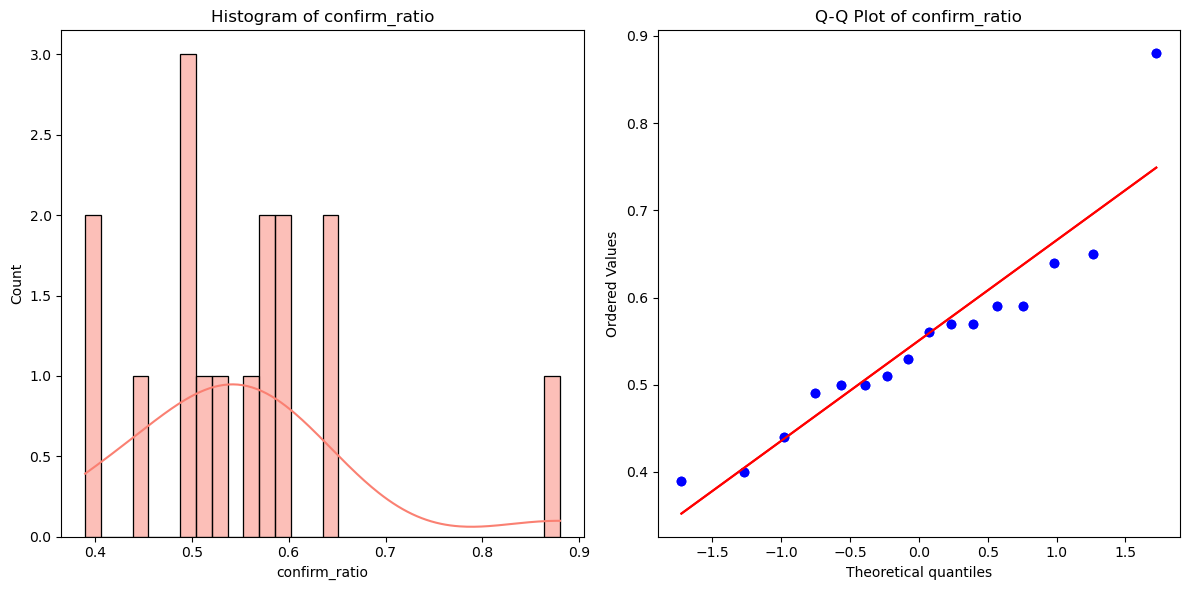

The test results indicate that the distribution is not significantly different from a normal distribution.


In [76]:
normality_check(df_control_age, 'confirm_ratio')

#### Hypothesis testing

In [77]:
# Set Hypothesis

#H0 total confirmation/day of each age group of test group <= total confirmation/day of each age group of control group
#H1 total confirmation/day of each age group of test group > total confirmation/day of each age group of test group

df_confirmation_test = df_control_age['confirm_ratio']
df_confirmation_control = df_test_age['confirm_ratio']

alpha = 0.05

t_stat, pvalue = st.ttest_ind(df_confirmation_test,df_confirmation_control, alternative="greater")
print('pvalue is', pvalue)

if pvalue < alpha:
    print("Fail to reject null hypothesis.")
else:
    print("Reject null hypothesis.")

pvalue is 0.9204325618432659
Reject null hypothesis.


In [78]:
hypothesis_testing(df_test_age, 'confirm_ratio', df_control_age, 'confirm_ratio', 0.05)

pvalue is 0.15913487631346812
Reject null hypothesis.


#### Visualization

In [353]:
df_concat_age = pd.concat([df_control_age,df_test_age], axis=0)
df_concat_age = df_concat_age.groupby(['variation','age_group'])[['confirm', 'no_confirm']].sum().reset_index()
df_concat_age['percentage_per_age_group'] = round((df_concat_age['confirm']/(df_concat_age['confirm']+df_concat_age['no_confirm'])*100),2)

df_concat_age

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_9644\1097264404.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



step_check,variation,age_group,confirm,no_confirm,percentage_per_age_group
0,Control,Teenagers,107,94,53.23
1,Control,Young Adults,5483,4715,53.77
2,Control,Adults,6451,5962,51.97
3,Control,Seniors,4096,5381,43.22
4,Test,Teenagers,146,87,62.66
5,Test,Young Adults,7470,4420,62.83
6,Test,Adults,8347,5943,58.41
7,Test,Seniors,5885,4974,54.19


In [80]:
fig = go.Figure()

# Add bars for each age group
age_groups = df_concat_age['age_group'].unique()
for age_group in age_groups:
    filtered_df_viz = df_concat_age[df_concat_age['age_group'] == age_group]
    fig.add_trace(go.Bar(
        name=age_group,
        x=filtered_df_viz['variation'],
        y=filtered_df_viz['percentage_per_age_group'],
        text=filtered_df_viz['percentage_per_age_group'].astype(str) + '%',  # Add percentage text
        textposition='outside'  # Display text above the bars
    ))

# Change the bar mode
fig.update_layout(
    barmode='group',
    title='Completion rate based on age group',
    xaxis_title='Group',
    yaxis_title='Percentage (%)',
    yaxis=dict(range=[0, 100]),
    legend_title='Age Group',
    font=dict(size=12)
)

fig.show()

In [349]:
# last update: the percentage is in decimal for visualization in power bi
df_concat_age.to_csv(f'../data/cleaned/h1_df_age.csv')

### Completion rate over test period based on tenure

In [81]:
df_control = df_main[df_main['variation'] == 'Control']
df_control['tenure_type'] = df_control['tenure_year'].apply(lambda row: 'long-standing' if row > 10 else 'new')
df_control_tenure = df_control.groupby(['variation','date', 'month','tenure_type','step_check'])['visit_id'].count().reset_index()
df_control_tenure = df_control_tenure.pivot(index=['variation','date','month','tenure_type'], columns='step_check', values='visit_id').fillna(0).reset_index()
df_control_tenure = df_control_tenure.pivot_table(index=['variation','date', 'month','tenure_type'], values=['confirm','no_confirm'], aggfunc='sum').reset_index()
df_control_tenure['confirm_ratio'] = round(df_control_tenure['confirm']/(df_control_tenure['confirm'] + df_control_tenure['no_confirm']),2)

df_control_tenure

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_9644\1899020585.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



step_check,variation,date,month,tenure_type,confirm,no_confirm,confirm_ratio
0,Control,2017-03-15,March,long-standing,40,22,0.65
1,Control,2017-03-15,March,new,37,22,0.63
2,Control,2017-03-16,March,long-standing,15,12,0.56
3,Control,2017-03-16,March,new,8,12,0.40
4,Control,2017-03-17,March,long-standing,2,8,0.20
...,...,...,...,...,...,...,...
191,Control,2017-06-18,June,new,44,38,0.54
192,Control,2017-06-19,June,long-standing,54,51,0.51
193,Control,2017-06-19,June,new,47,34,0.58
194,Control,2017-06-20,June,long-standing,66,57,0.54


In [82]:
df_test = df_main[df_main['variation'] == 'Test']
df_test['tenure_type'] = df_test['tenure_year'].apply(lambda row: 'long-standing' if row > 10 else 'new')
df_test_tenure = df_test.groupby(['variation','date', 'month','tenure_type','step_check'])['visit_id'].count().reset_index()
df_test_tenure = df_test_tenure.pivot(index=['variation','date','month','tenure_type'], columns='step_check', values='visit_id').fillna(0).reset_index()
df_test_tenure = df_test_tenure.pivot_table(index=['variation','date', 'month','tenure_type'], values=['confirm','no_confirm'], aggfunc='sum').reset_index()
df_test_tenure['confirm_ratio'] = round(df_control_tenure['confirm']/(df_control_tenure['confirm'] + df_control_tenure['no_confirm']),2)

df_test_tenure

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_9644\1320716983.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



step_check,variation,date,month,tenure_type,confirm,no_confirm,confirm_ratio
0,Test,2017-03-15,March,long-standing,42,27,0.65
1,Test,2017-03-15,March,new,45,32,0.63
2,Test,2017-03-16,March,long-standing,20,12,0.56
3,Test,2017-03-16,March,new,15,9,0.40
4,Test,2017-03-17,March,long-standing,8,7,0.20
...,...,...,...,...,...,...,...
191,Test,2017-06-18,June,new,36,27,0.54
192,Test,2017-06-19,June,long-standing,52,40,0.51
193,Test,2017-06-19,June,new,43,30,0.58
194,Test,2017-06-20,June,long-standing,56,37,0.54


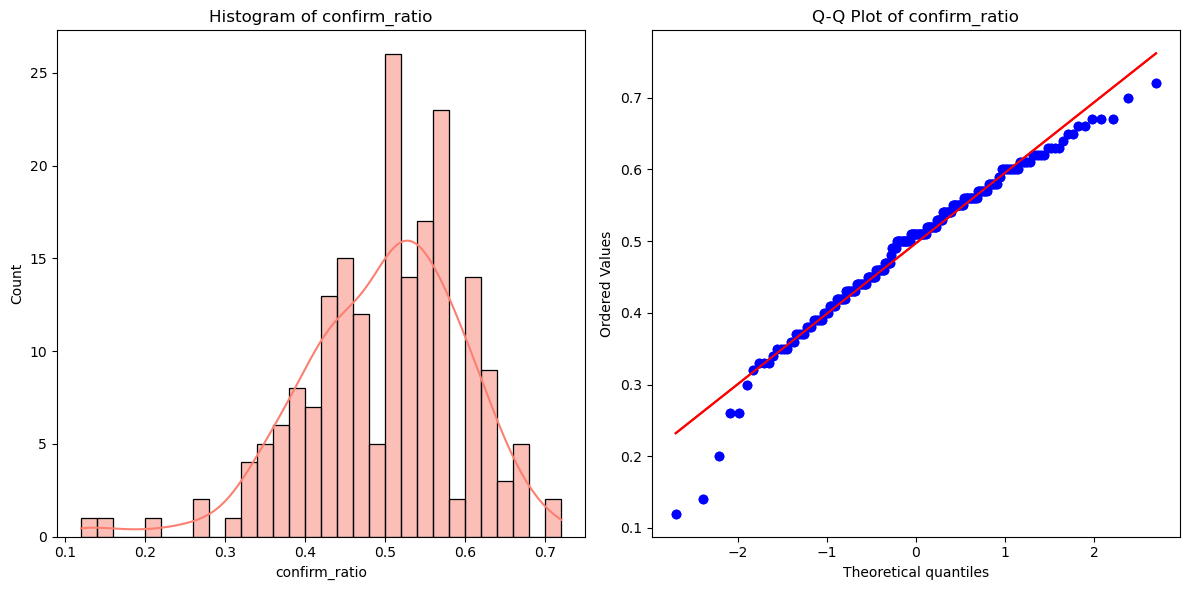

The test results indicate that the distribution is significantly different from a normal distribution.


In [83]:
normality_check(df_control_tenure, 'confirm_ratio')

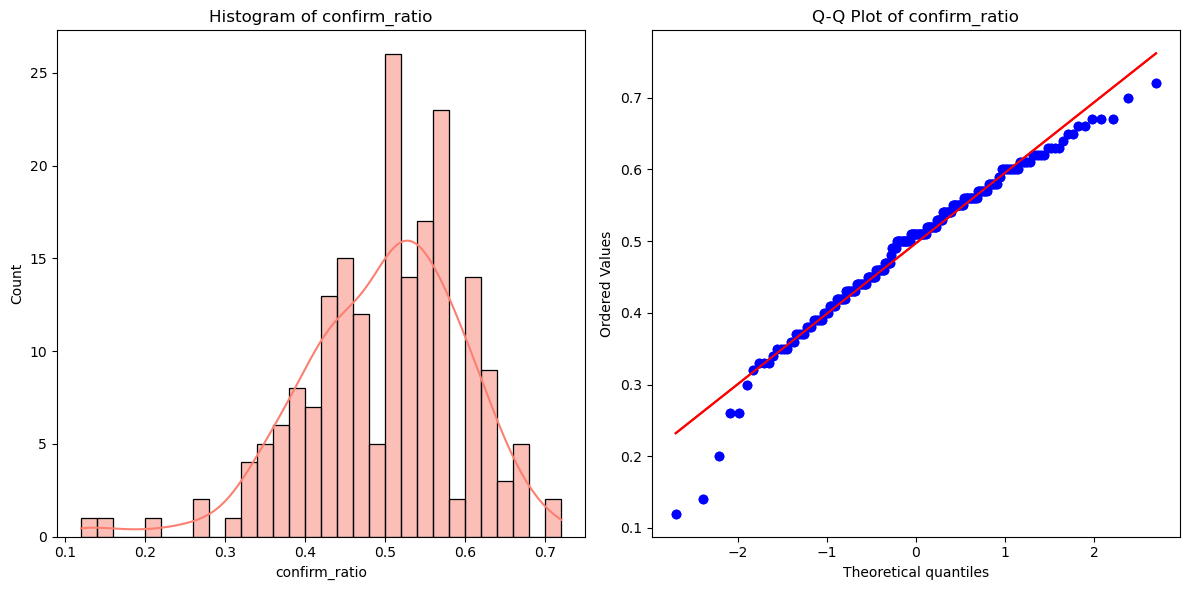

The test results indicate that the distribution is significantly different from a normal distribution.


In [84]:
normality_check(df_test_tenure, 'confirm_ratio')

### Normalize the tenure data

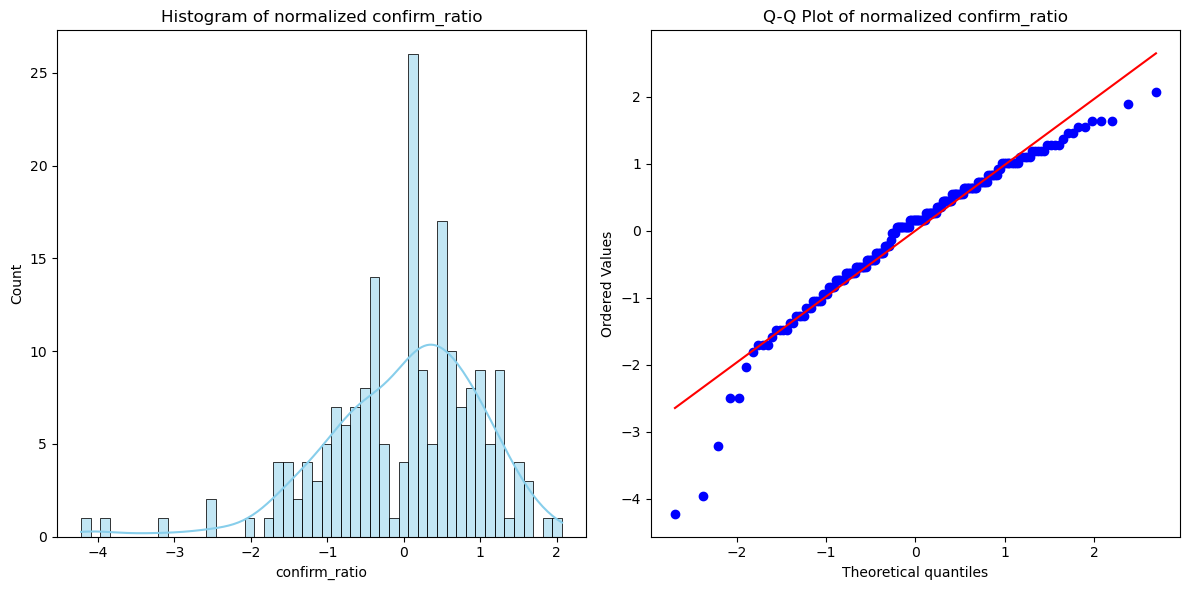

In [85]:
data_normalization(df_control_tenure, 'confirm_ratio')

In [86]:
df_control_tenure.head()

step_check,variation,date,month,tenure_type,confirm,no_confirm,confirm_ratio
0,Control,2017-03-15,March,long-standing,40,22,0.500775
1,Control,2017-03-15,March,new,37,22,0.488580
2,Control,2017-03-16,March,long-standing,15,12,0.444686
3,Control,2017-03-16,March,new,8,12,0.336472
4,Control,2017-03-17,March,long-standing,2,8,0.182322


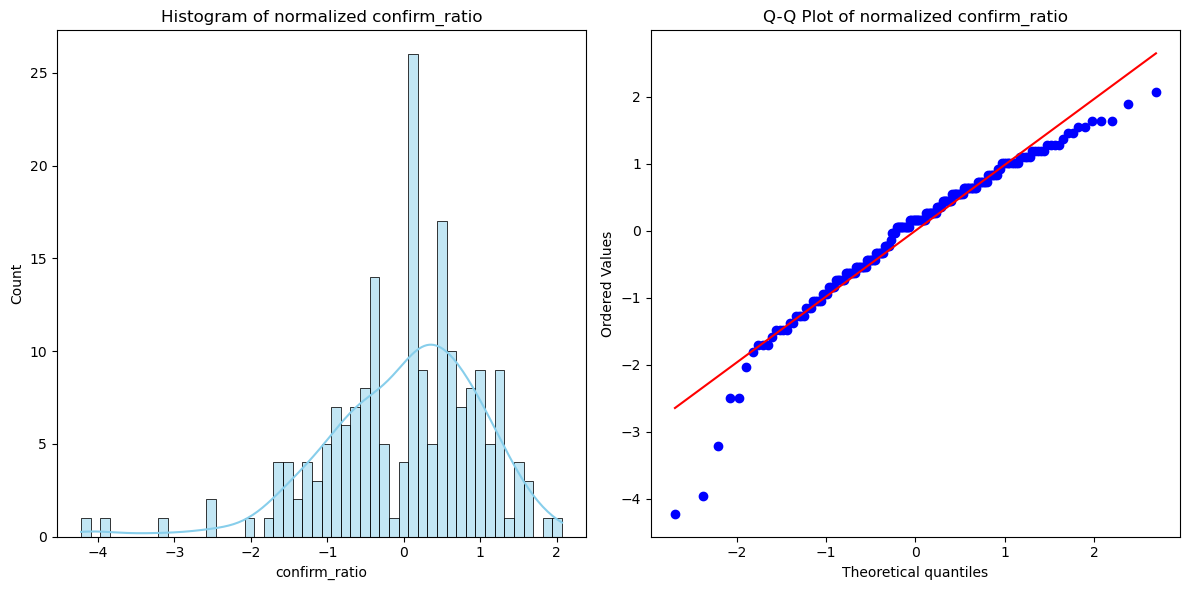

In [87]:
data_normalization(df_test_tenure, 'confirm_ratio')

In [88]:
df_test_tenure.head()

step_check,variation,date,month,tenure_type,confirm,no_confirm,confirm_ratio
0,Test,2017-03-15,March,long-standing,42,27,0.500775
1,Test,2017-03-15,March,new,45,32,0.488580
2,Test,2017-03-16,March,long-standing,20,12,0.444686
3,Test,2017-03-16,March,new,15,9,0.336472
4,Test,2017-03-17,March,long-standing,8,7,0.182322


#### Hypothesis testing

In [313]:
hypothesis_testing(df_control_tenure, 'confirm_ratio', df_test_tenure, 'confirm_ratio', 0.05)

pvalue is 0.5
Reject null hypothesis.


#### Visualization

In [352]:
df_concat_tenure = pd.concat([df_control_tenure, df_test_tenure], axis=0)
df_concat_tenure = df_concat_tenure.groupby(['variation','tenure_type'])[['confirm', 'no_confirm']].sum().reset_index()
df_concat_tenure['percentage_per_tenure_type'] = round((df_concat_tenure['confirm']/(df_concat_tenure['confirm']+df_concat_tenure['no_confirm'])*100),2)

df_concat_tenure

step_check,variation,tenure_type,confirm,no_confirm,percentage_per_tenure_type
0,Control,long-standing,8356,8629,49.20
1,Control,new,7781,7523,50.84
2,Test,long-standing,11366,8160,58.21
3,Test,new,10482,7264,59.07


In [91]:
fig = go.Figure()

# Add bars for each age group
tenure_types = df_concat_tenure['tenure_type'].unique()
for tenure_type in tenure_types:
    filtered_df_viz = df_concat_tenure[df_concat_tenure['tenure_type'] == tenure_type]
    fig.add_trace(go.Bar(
        name=tenure_type,
        x=filtered_df_viz['variation'],
        y=filtered_df_viz['percentage_per_tenure_type'],
        text=filtered_df_viz['percentage_per_tenure_type'].astype(str) + '%',  # Add percentage text
        textposition='outside'  # Display text above the bars
    ))

# Change the bar mode
fig.update_layout(
    barmode='group',
    title='Completion rate based on tenure type',
    xaxis_title='Group',
    yaxis_title='Percentage (%)',
    yaxis=dict(range=[0, 100]),
    legend_title='Tenure type',
    font=dict(size=12)
)

fig.show()

In [351]:
# last update: percentage in decimal for visualization in powerbi
df_concat_tenure.to_csv(f'../data/cleaned/h1_df_tenure.csv')

## Data Cleaning for deeper analysis on completion rate

In [92]:
df_merge_1 = pd.merge(df_final_demo_cleaned, df_final_experiment_clients_cleaned, on='client_id', how='inner')
df_merge_1

,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,age_group,tenure_type,variation
0,836976,6.0,73.0,60.5,U,2,45105.30,6,9,Seniors,new,Test
1,2304905,7.0,94.0,58.0,U,2,110860.30,6,9,Adults,new,Control
2,1439522,5.0,64.0,32.0,U,2,52467.79,6,9,Young Adults,new,Test
3,1562045,16.0,198.0,49.0,M,2,67454.65,3,6,Adults,long-standing,Test
4,5126305,12.0,145.0,33.0,F,2,103671.75,0,3,Young Adults,long-standing,Control
...,...,...,...,...,...,...,...,...,...,...,...,...
50495,1780858,21.0,262.0,68.5,M,3,372100.59,6,9,Seniors,long-standing,Test
50496,6967120,21.0,260.0,68.5,M,3,4279873.38,6,9,Seniors,long-standing,Control
50497,5826160,20.0,249.0,56.5,F,2,44837.16,2,5,Adults,long-standing,Test
50498,8739285,19.0,229.0,69.5,F,2,44994.24,1,4,Seniors,long-standing,Test


In [93]:
df_merge = pd.merge(df_merge_1, df_final_web_data_cleaned, on='client_id', how='inner')
df_merge


,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,age_group,tenure_type,variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2,45105.30,6,9,Seniors,new,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,U,2,45105.30,6,9,Seniors,new,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,U,2,45105.30,6,9,Seniors,new,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,U,2,45105.30,6,9,Seniors,new,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,U,2,45105.30,6,9,Seniors,new,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317230,7468138,18.0,222.0,61.0,F,3,209278.15,0,3,Seniors,long-standing,Test,317123960_46820919455,769876461_30381166055_830233,step_2,2017-03-30 23:59:15
317231,7468138,18.0,222.0,61.0,F,3,209278.15,0,3,Seniors,long-standing,Test,317123960_46820919455,769876461_30381166055_830233,step_1,2017-03-30 23:58:51
317232,7468138,18.0,222.0,61.0,F,3,209278.15,0,3,Seniors,long-standing,Test,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:58:40
317233,7468138,18.0,222.0,61.0,F,3,209278.15,0,3,Seniors,long-standing,Test,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:55:11


In [94]:
irrelevant_columns = ['tenure_month', 'visitor_id', 'visit_id', 'date_time']
df_new = df_merge[df_merge['process_step'] == 'confirm'].drop(columns=irrelevant_columns).drop_duplicates().reset_index(drop=True)
df_new

,client_id,tenure_year,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,age_group,tenure_type,variation,process_step
0,836976,6.0,60.5,U,2,45105.30,6,9,Seniors,new,Test,confirm
1,2304905,7.0,58.0,U,2,110860.30,6,9,Adults,new,Control,confirm
2,3727881,5.0,30.5,U,2,23915.60,0,3,Young Adults,new,Control,confirm
3,272934,5.0,58.5,U,2,27021.42,2,5,Adults,new,Control,confirm
4,388801,30.0,57.5,M,5,522498.72,1,4,Adults,long-standing,Test,confirm
...,...,...,...,...,...,...,...,...,...,...,...,...
34116,4079649,23.0,62.5,M,3,57575.28,4,7,Seniors,long-standing,Control,confirm
34117,1780858,21.0,68.5,M,3,372100.59,6,9,Seniors,long-standing,Test,confirm
34118,6967120,21.0,68.5,M,3,4279873.38,6,9,Seniors,long-standing,Control,confirm
34119,5826160,20.0,56.5,F,2,44837.16,2,5,Adults,long-standing,Test,confirm


In [95]:
df_new['variation'].value_counts()

variation
Test       18687
Control    15434
Name: count, dtype: int64

In [96]:
df_new['age_group'].value_counts()

age_group
Adults          13323
Young Adults    12063
Seniors          8508
Teenagers         227
Name: count, dtype: int64

In [98]:
df_main.head()

,client_id,tenure_year,age,gender,age_group,tenure_type,variation,visitor_id,visit_id,date,month,step_check
0,836976,6.0,60.5,U,Seniors,new,Test,427070339_1413275162,228976764_46825473280_96584,2017-04-02,April,confirm
1,836976,6.0,60.5,U,Seniors,new,Test,427070339_1413275162,104438405_2368283624_817211,2017-03-29,March,no_confirm
2,2304905,7.0,58.0,U,Adults,new,Control,336210275_56978226960,724930510_65323235593_692754,2017-05-21,May,confirm
3,1439522,5.0,32.0,U,Young Adults,new,Test,245908175_84333642537,898099666_87299892721_263146,2017-04-06,April,no_confirm
4,1439522,5.0,32.0,U,Young Adults,new,Test,407067363_48226131468,968288276_7230824336_666089,2017-04-07,April,no_confirm


## Time spent per step per visit_id

In [99]:
# merge all the dataframes
df_merge_1 = pd.merge(df_final_demo_cleaned, df_final_experiment_clients_cleaned, on='client_id', how='inner')
df_main_2 = pd.merge(df_merge_1, df_final_web_data_cleaned, on='client_id', how='inner')
    
# format datetime and add date and month column
df_main_2['date_time'] = pd.to_datetime(df_main_2['date_time'], errors='coerce')

In [1]:
df_main_2.head()

NameError: name 'df_main_2' is not defined

In [101]:

df_sorted = df_main_2.sort_values(by=['visit_id', 'process_step', 'date_time'], ascending=[True, True, False])
df_sorted.head(5)

,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,age_group,tenure_type,variation,visitor_id,visit_id,process_step,date_time
300509,3561384,4.0,56.0,59.5,U,2,63130.44,6,9,Seniors,new,Test,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09
300510,3561384,4.0,56.0,59.5,U,2,63130.44,6,9,Seniors,new,Test,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17
76879,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Young Adults,new,Test,612065484_94198474375,100019538_17884295066_43909,confirm,2017-04-09 16:24:58
76883,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Young Adults,new,Test,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:21:59
76884,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Young Adults,new,Test,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:21:45


In [102]:
# drop duplicate and take the latest date_time 

df_main_2 = df_sorted.drop_duplicates(subset=['visit_id','process_step'], keep='first').reset_index()
df_main_2

,index,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,age_group,tenure_type,variation,visitor_id,visit_id,process_step,date_time
0,300509,3561384,4.0,56.0,59.5,U,2,63130.44,6,9,Seniors,new,Test,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09
1,76879,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Young Adults,new,Test,612065484_94198474375,100019538_17884295066_43909,confirm,2017-04-09 16:24:58
2,76883,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Young Adults,new,Test,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:21:59
3,76882,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Young Adults,new,Test,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:22:04
4,76881,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Young Adults,new,Test,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:22:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238282,96178,4064969,6.0,75.0,64.5,U,2,74783.76,5,8,Seniors,new,Control,110735946_42614968419,999985675_64610694964_443659,step_2,2017-04-20 09:47:04
238283,96177,4064969,6.0,75.0,64.5,U,2,74783.76,5,8,Seniors,new,Control,110735946_42614968419,999985675_64610694964_443659,step_3,2017-04-20 09:48:45
238284,196243,6627522,18.0,227.0,58.0,F,2,1056775.54,6,9,Adults,long-standing,Test,730634087_44272418812,999988789_76411676596_272843,start,2017-04-21 23:51:09
238285,196244,6627522,18.0,227.0,58.0,F,2,1056775.54,6,9,Adults,long-standing,Test,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:51:00


In [103]:
# split the data of Control and Test Group

df_control_time_spent = df_main_2[df_main_2['variation'] == 'Control'].reset_index()
df_test_time_spent = df_main_2[df_main_2['variation'] == 'Test'].reset_index()

In [104]:
# calculate time spent per step

# create new df for each step
df_step_start = df_main_2[df_main_2['process_step'] == 'start'][['variation','visit_id', 'date_time']]
df_step_1 = df_main_2[df_main_2['process_step'] == 'step_1'][['variation','visit_id', 'date_time']]
df_step_2 = df_main_2[df_main_2['process_step'] == 'step_2'][['variation','visit_id', 'date_time']]
df_step_3 = df_main_2[df_main_2['process_step'] == 'step_3'][['variation','visit_id', 'date_time']]
df_step_confirm = df_main_2[df_main_2['process_step'] == 'confirm'][['variation','visit_id', 'date_time']]


In [105]:
# calculate time spent per step of Control Group

# create new df for each step
df_control_step_start = df_control_time_spent[df_control_time_spent['process_step'] == 'start'][['variation','visit_id', 'date_time']]
df_control_step_1 = df_control_time_spent[df_control_time_spent['process_step'] == 'step_1'][['variation','visit_id', 'date_time']]
df_control_step_2 = df_control_time_spent[df_control_time_spent['process_step'] == 'step_2'][['variation','visit_id', 'date_time']]
df_control_step_3 = df_control_time_spent[df_control_time_spent['process_step'] == 'step_3'][['variation','visit_id', 'date_time']]
df_control_step_confirm = df_control_time_spent[df_control_time_spent['process_step'] == 'confirm'][['variation','visit_id', 'date_time']]

In [106]:
# merge two steps on 'visit_id', so, we need to rename the date_time of each step

df_control_step_start = df_control_step_start.rename(columns={'date_time': 'date_time_start'})
df_control_step_1 = df_control_step_1.rename(columns={'date_time': 'date_time_step_1'})
df_control_step_2 = df_control_step_2.rename(columns={'date_time': 'date_time_step_2'})
df_control_step_3 = df_control_step_3.rename(columns={'date_time': 'date_time_step_3'})
df_control_step_confirm = df_control_step_confirm.rename(columns={'date_time': 'date_time_confirm'})

In [107]:
# calculate time spent per step of Test Group

# create new df for each step
df_test_step_start = df_test_time_spent[df_test_time_spent['process_step'] == 'start'][['variation','visit_id', 'date_time']]
df_test_step_1 = df_test_time_spent[df_test_time_spent['process_step'] == 'step_1'][['variation','visit_id', 'date_time']]
df_test_step_2 = df_test_time_spent[df_test_time_spent['process_step'] == 'step_2'][['variation','visit_id', 'date_time']]
df_test_step_3 = df_test_time_spent[df_test_time_spent['process_step'] == 'step_3'][['variation','visit_id', 'date_time']]
df_test_step_confirm = df_test_time_spent[df_test_time_spent['process_step'] == 'confirm'][['variation','visit_id', 'date_time']]

In [108]:
# merge two steps on 'visit_id', so, we need to rename the date_time of each step

df_test_step_start = df_test_step_start.rename(columns={'date_time': 'date_time_start'})
df_test_step_1 = df_test_step_1.rename(columns={'date_time': 'date_time_step_1'})
df_test_step_2 = df_test_step_2.rename(columns={'date_time': 'date_time_step_2'})
df_test_step_3 = df_test_step_3.rename(columns={'date_time': 'date_time_step_3'})
df_test_step_confirm = df_test_step_confirm.rename(columns={'date_time': 'date_time_confirm'})

In [109]:
# merge two dataframes

df_control_step_start_1 = pd.merge(df_control_step_start, df_control_step_1, on='visit_id')
df_control_step_1_2 = pd.merge(df_control_step_1, df_control_step_2, on='visit_id')
df_control_step_2_3 = pd.merge(df_control_step_2, df_control_step_3, on='visit_id')
df_control_step_3_confirm = pd.merge(df_control_step_3, df_control_step_confirm, on='visit_id')
df_control_step_1_2

,variation_x,visit_id,date_time_step_1,variation_y,date_time_step_2
0,Control,100057941_88477660212_944512,2017-04-09 11:33:21,Control,2017-04-09 11:33:58
1,Control,10006594_66157970412_679648,2017-04-13 11:50:28,Control,2017-04-13 11:50:38
2,Control,10007589_47780784567_391490,2017-05-18 07:54:19,Control,2017-05-18 07:55:05
3,Control,100254180_47139859079_984581,2017-04-05 21:42:54,Control,2017-04-05 21:43:46
4,Control,100309269_21684743336_936307,2017-04-16 06:20:13,Control,2017-04-16 06:20:42
...,...,...,...,...,...
19978,Control,999528902_49133507319_516085,2017-03-29 18:00:24,Control,2017-03-29 18:00:56
19979,Control,999707810_18368223868_308626,2017-04-21 21:16:45,Control,2017-04-21 21:17:55
19980,Control,999859408_41720215615_938916,2017-04-05 13:35:46,Control,2017-04-05 13:36:27
19981,Control,999890184_77121766521_746360,2017-04-19 11:19:14,Control,2017-04-19 11:19:27


In [110]:
# merge two dataframes
df_test_step_start_1 = pd.merge(df_test_step_start, df_test_step_1, on='visit_id')
df_test_step_1_2 = pd.merge(df_test_step_1, df_test_step_2, on='visit_id')
df_test_step_2_3 = pd.merge(df_test_step_2, df_test_step_3, on='visit_id')
df_test_step_3_confirm = pd.merge(df_test_step_3, df_test_step_confirm, on='visit_id')

In [111]:
# calculate time spent per step

average_time_spent_control_start_1 = round((df_control_step_start_1['date_time_step_1'] - df_control_step_start_1['date_time_start']).mean().total_seconds(),2)
average_time_spent_control_1_2 = round((df_control_step_1_2['date_time_step_2'] - df_control_step_1_2['date_time_step_1']).mean().total_seconds(),2)
average_time_spent_control_2_3 = round((df_control_step_2_3['date_time_step_3'] - df_control_step_2_3['date_time_step_2']).mean().total_seconds(),2)
average_time_spent_control_3_confirm = round((df_control_step_3_confirm['date_time_confirm'] - df_control_step_3_confirm['date_time_step_3']).mean().total_seconds(),2)

average_time_spent_test_start_1 = round((df_test_step_start_1['date_time_step_1'] - df_test_step_start_1['date_time_start']).mean().total_seconds(),2)
average_time_spent_test_1_2 = round((df_test_step_1_2['date_time_step_2'] - df_test_step_1_2['date_time_step_1']).mean().total_seconds(),2)
average_time_spent_test_2_3 = round((df_test_step_2_3['date_time_step_3'] - df_test_step_2_3['date_time_step_2']).mean().total_seconds(),2)
average_time_spent_test_3_confirm = round((df_test_step_3_confirm['date_time_confirm'] - df_test_step_3_confirm['date_time_step_3']).mean().total_seconds(),2)


print('average time between step start and 1 in Control group:', average_time_spent_control_start_1)
print('average time between step 1 and 2 in Control group:', average_time_spent_control_1_2)
print('average time between step 2 and 3 in Control group:', average_time_spent_control_2_3)
print('average time between step 3 and confirm in Control group:', average_time_spent_control_3_confirm)

print('average time between step start and 1 in Test group:', average_time_spent_test_start_1)
print('average time between step 1 and 2 in Test group:', average_time_spent_test_1_2)
print('average time between step 2 and 3 in Test group:', average_time_spent_test_2_3)
print('average time between step 3 and confirm in Test group:', average_time_spent_test_3_confirm)



average time between step start and 1 in Control group: 18.08
average time between step 1 and 2 in Control group: 34.31
average time between step 2 and 3 in Control group: 94.65
average time between step 3 and confirm in Control group: 135.66
average time between step start and 1 in Test group: 3.28
average time between step 1 and 2 in Test group: 37.49
average time between step 2 and 3 in Test group: 92.78
average time between step 3 and confirm in Test group: 143.24


In [112]:
time_spent_summary = pd.DataFrame({
    'step': ['start - step 1', 'step 1 - step 2', 'step 2 - step 3', 'step 3 - confirm'],
    'Control (s)': [average_time_spent_control_start_1,average_time_spent_control_1_2,average_time_spent_control_2_3,average_time_spent_control_3_confirm],
    'Test (s)': [average_time_spent_test_start_1,average_time_spent_test_1_2,average_time_spent_test_2_3,average_time_spent_test_3_confirm]
})

In [113]:
time_spent_summary

,step,Control (s),Test (s)
0,start - step 1,18.08,3.28
1,step 1 - step 2,34.31,37.49
2,step 2 - step 3,94.65,92.78
3,step 3 - confirm,135.66,143.24


In [322]:
time_spent_summary.to_csv(f'../data/cleaned/h2_time_spent.csv')

In [114]:
# Time spent completion from start to confirm

# merge two dataframes

df_control_step_start_confirm = pd.merge(df_control_step_start, df_control_step_confirm, on='visit_id').reset_index()
df_test_step_start_confirm = pd.merge(df_test_step_start, df_test_step_confirm, on='visit_id').reset_index()


# calculate time spent per step

average_time_spent_control_start_confirm = round((df_control_step_start_confirm['date_time_confirm'] - df_control_step_start_confirm['date_time_start']).mean().total_seconds(),2)
average_time_spent_test_start_confirm = round((df_test_step_start_confirm['date_time_confirm'] - df_test_step_start_confirm['date_time_start']).mean().total_seconds(),2)


print('average completion time of Control group:', average_time_spent_control_start_confirm,'s')
print('average completion time of Test group:', average_time_spent_test_start_confirm, 's')

average completion time of Control group: 310.64 s
average completion time of Test group: 315.15 s


### Which step that visit_id mostly end before confirm

In [115]:
df_main_2.head()

,index,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,age_group,tenure_type,variation,visitor_id,visit_id,process_step,date_time
0,300509,3561384,4.0,56.0,59.5,U,2,63130.44,6,9,Seniors,new,Test,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09
1,76879,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Young Adults,new,Test,612065484_94198474375,100019538_17884295066_43909,confirm,2017-04-09 16:24:58
2,76883,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Young Adults,new,Test,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:21:59
3,76882,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Young Adults,new,Test,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:22:04
4,76881,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Young Adults,new,Test,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:22:08


In [116]:
df_control_time_spent.sort_values(by=['visit_id','date_time'], ascending=[True, False]).tail(20)

,level_0,index,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,age_group,tenure_type,variation,visitor_id,visit_id,process_step,date_time
108707,238200,186096,4530744,9.0,118.0,71.0,M,2,36324.26,6,9,Seniors,new,Control,972288208_26214030705,999720028_44146654962_446209,step_1,2017-04-25 20:36:55
108706,238199,186097,4530744,9.0,118.0,71.0,M,2,36324.26,6,9,Seniors,new,Control,972288208_26214030705,999720028_44146654962_446209,start,2017-04-25 20:36:37
108708,238213,72862,9086225,14.0,178.0,38.5,M,2,35037.09,0,3,Young Adults,long-standing,Control,305364973_89055125642,999814517_15202944548_822095,confirm,2017-03-29 12:13:26
108709,238214,72863,9086225,14.0,178.0,38.5,M,2,35037.09,0,3,Young Adults,long-standing,Control,305364973_89055125642,999814517_15202944548_822095,step_3,2017-03-29 12:11:58
108710,238227,311392,7462323,7.0,94.0,53.5,U,2,210560.30,2,5,Adults,new,Control,847563410_72648439715,999859408_41720215615_938916,confirm,2017-04-05 13:39:45
108714,238231,311393,7462323,7.0,94.0,53.5,U,2,210560.30,2,5,Adults,new,Control,847563410_72648439715,999859408_41720215615_938916,step_3,2017-04-05 13:38:27
108713,238230,311394,7462323,7.0,94.0,53.5,U,2,210560.30,2,5,Adults,new,Control,847563410_72648439715,999859408_41720215615_938916,step_2,2017-04-05 13:36:27
108712,238229,311395,7462323,7.0,94.0,53.5,U,2,210560.30,2,5,Adults,new,Control,847563410_72648439715,999859408_41720215615_938916,step_1,2017-04-05 13:35:46
108711,238228,311396,7462323,7.0,94.0,53.5,U,2,210560.30,2,5,Adults,new,Control,847563410_72648439715,999859408_41720215615_938916,start,2017-04-05 13:35:37
108715,238232,246411,7031731,5.0,69.0,32.0,U,2,34973.20,6,9,Young Adults,new,Control,675674236_56499394876,999890184_77121766521_746360,start,2017-04-19 11:28:29


In [117]:
df_final_web_data[df_final_web_data['visit_id'] == '999814517_15202944548_822095']

,client_id,visitor_id,visit_id,process_step,date_time
111664,9086225,305364973_89055125642,999814517_15202944548_822095,confirm,2017-03-29 12:13:26
111665,9086225,305364973_89055125642,999814517_15202944548_822095,step_3,2017-03-29 12:11:58


In [118]:
df_final_web_data[df_final_web_data['visitor_id'] == '305364973_89055125642']

,client_id,visitor_id,visit_id,process_step,date_time
111664,9086225,305364973_89055125642,999814517_15202944548_822095,confirm,2017-03-29 12:13:26
111665,9086225,305364973_89055125642,999814517_15202944548_822095,step_3,2017-03-29 12:11:58
111666,9086225,305364973_89055125642,85920501_4292838616_548864,step_2,2017-03-29 12:10:31
111667,9086225,305364973_89055125642,85920501_4292838616_548864,step_1,2017-03-29 12:10:25
111668,9086225,305364973_89055125642,85920501_4292838616_548864,start,2017-03-29 12:10:10


In [119]:
df_final_web_data[df_final_web_data['client_id'] == 9086225]

,client_id,visitor_id,visit_id,process_step,date_time
111664,9086225,305364973_89055125642,999814517_15202944548_822095,confirm,2017-03-29 12:13:26
111665,9086225,305364973_89055125642,999814517_15202944548_822095,step_3,2017-03-29 12:11:58
111666,9086225,305364973_89055125642,85920501_4292838616_548864,step_2,2017-03-29 12:10:31
111667,9086225,305364973_89055125642,85920501_4292838616_548864,step_1,2017-03-29 12:10:25
111668,9086225,305364973_89055125642,85920501_4292838616_548864,start,2017-03-29 12:10:10


In [120]:
df_final_demo[df_final_demo['client_id'] == 9086225]

,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month
11592,9086225,14.0,178.0,38.5,M,2,35037.09,0,3


In [121]:
df_control_time_spent.head()

,level_0,index,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,age_group,tenure_type,variation,visitor_id,visit_id,process_step,date_time
0,11,148160,105007,9.0,118.0,35.0,F,2,34897.47,3,6,Young Adults,new,Control,676020267_36602664238,100030127_47967100085_936361,start,2017-03-22 11:07:49
1,12,226825,5623007,16.0,202.0,78.0,M,2,146827.14,5,8,Seniors,long-standing,Control,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:44:03
2,13,226826,5623007,16.0,202.0,78.0,M,2,146827.14,5,8,Seniors,long-standing,Control,700426174_33289797318,100037962_47432393712_705583,step_1,2017-04-14 16:43:55
3,14,137007,4823947,7.0,86.0,52.0,U,2,47340.11,5,8,Adults,new,Control,611052344_43146965242,100057941_88477660212_944512,start,2017-04-09 11:30:10
4,15,137003,4823947,7.0,86.0,52.0,U,2,47340.11,5,8,Adults,new,Control,611052344_43146965242,100057941_88477660212_944512,step_1,2017-04-09 11:33:21


In [122]:
# check number of visit_id per client_id and visitor_id

visit_counts = df_control_time_spent.groupby(['client_id','visitor_id'])['visit_id'].nunique().reset_index()
visit_counts = visit_counts.rename(columns={'visit_id':'total_visits'})
visit_counts

,client_id,visitor_id,total_visits
0,1028,42237450_62128060588,1
1,1104,194240915_18158000533,2
2,1186,446844663_31615102958,2
3,1195,766842522_69992551638,1
4,1197,753759429_54481946928,1
...,...,...,...
26278,9997391,494669706_3354361161,1
26279,9997470,395791369_55562604618,2
26280,9997470,91394485_75296404278,1
26281,9998346,292425655_16607136645,1


In [123]:
# check visit_id more than 1 for each client_id and visitor_id
filtered_visits = visit_counts[visit_counts['total_visits'] > 1]

filtered_visits

,client_id,visitor_id,total_visits
1,1104,194240915_18158000533,2
2,1186,446844663_31615102958,2
8,3647,742136411_92170694666,2
10,5354,233679354_36495397627,2
14,7020,131463516_45910398094,2
...,...,...,...
26250,9989637,439760698_21974421377,3
26259,9992229,392707553_90519001571,2
26268,9995084,814602810_36439951509,3
26269,9995265,932911574_27729644858,2


In [124]:
df_final_web_data[df_final_web_data['visitor_id'] == '194240915_18158000533']

,client_id,visitor_id,visit_id,process_step,date_time
34093,1104,194240915_18158000533,543158812_46395476577_767725,start,2017-06-12 07:49:18
34125,1104,194240915_18158000533,643221571_99977972121_69283,start,2017-06-20 22:31:33


In [125]:
df_final_web_data[df_final_web_data['visitor_id'] == '446844663_31615102958']

,client_id,visitor_id,visit_id,process_step,date_time
237452,1186,446844663_31615102958,795373564_99931517312_810896,step_2,2017-04-08 18:05:24
237453,1186,446844663_31615102958,795373564_99931517312_810896,step_1,2017-04-08 18:05:13
237454,1186,446844663_31615102958,795373564_99931517312_810896,start,2017-04-08 18:05:02
237455,1186,446844663_31615102958,507052512_11309370126_442139,start,2017-04-08 15:59:16


In [126]:
df_final_web_data[df_final_web_data['visitor_id'] == '439760698_21974421377']

,client_id,visitor_id,visit_id,process_step,date_time
203391,9989637,439760698_21974421377,225711767_14757866445_397332,confirm,2017-03-29 11:27:58
203421,9989637,439760698_21974421377,225711767_14757866445_397332,step_3,2017-03-29 11:27:06
203422,9989637,439760698_21974421377,225711767_14757866445_397332,step_2,2017-03-29 11:26:16
203423,9989637,439760698_21974421377,225711767_14757866445_397332,step_1,2017-03-29 11:26:02
203424,9989637,439760698_21974421377,225711767_14757866445_397332,start,2017-03-29 11:24:00
203489,9989637,439760698_21974421377,437622322_76210310811_81676,step_1,2017-04-20 16:39:02
203490,9989637,439760698_21974421377,437622322_76210310811_81676,start,2017-04-20 16:38:40
243967,9989637,439760698_21974421377,234132625_85337481676_135489,confirm,2017-05-17 10:55:14


In [127]:

df_control_time_spent['date'] = df_control_time_spent['date_time'].dt.date
df_control_time_spent['time'] = df_control_time_spent['date_time'].dt.time
df_control_time_spent.head()

,level_0,index,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,age_group,tenure_type,variation,visitor_id,visit_id,process_step,date_time,date,time
0,11,148160,105007,9.0,118.0,35.0,F,2,34897.47,3,6,Young Adults,new,Control,676020267_36602664238,100030127_47967100085_936361,start,2017-03-22 11:07:49,2017-03-22,11:07:49
1,12,226825,5623007,16.0,202.0,78.0,M,2,146827.14,5,8,Seniors,long-standing,Control,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:44:03,2017-04-14,16:44:03
2,13,226826,5623007,16.0,202.0,78.0,M,2,146827.14,5,8,Seniors,long-standing,Control,700426174_33289797318,100037962_47432393712_705583,step_1,2017-04-14 16:43:55,2017-04-14,16:43:55
3,14,137007,4823947,7.0,86.0,52.0,U,2,47340.11,5,8,Adults,new,Control,611052344_43146965242,100057941_88477660212_944512,start,2017-04-09 11:30:10,2017-04-09,11:30:10
4,15,137003,4823947,7.0,86.0,52.0,U,2,47340.11,5,8,Adults,new,Control,611052344_43146965242,100057941_88477660212_944512,step_1,2017-04-09 11:33:21,2017-04-09,11:33:21


In [128]:
visit_counts_per_date = df_control_time_spent.groupby(['client_id','visitor_id','date'])['visit_id'].nunique().reset_index()
visit_counts_per_date = visit_counts_per_date.rename(columns={'visit_id':'visits_per_date'})
visit_counts_per_date

,client_id,visitor_id,date,visits_per_date
0,1028,42237450_62128060588,2017-04-08,1
1,1104,194240915_18158000533,2017-06-12,1
2,1104,194240915_18158000533,2017-06-20,1
3,1186,446844663_31615102958,2017-04-08,2
4,1195,766842522_69992551638,2017-04-05,1
...,...,...,...,...
31282,9997470,395791369_55562604618,2017-04-20,1
31283,9997470,395791369_55562604618,2017-05-09,1
31284,9997470,91394485_75296404278,2017-04-07,1
31285,9998346,292425655_16607136645,2017-03-29,1


In [129]:
# check visit_id more than 1 for each client_id and visitor_id

filtered_visits = visit_counts_per_date[visit_counts_per_date['visits_per_date'] > 1]
filtered_visits

,client_id,visitor_id,date,visits_per_date
3,1186,446844663_31615102958,2017-04-08,2
76,21970,884689567_69949404962,2017-04-09,2
78,22885,7801409_9805440892,2017-04-24,2
146,47402,854385699_7834303210,2017-04-05,2
193,58196,983697480_34448825600,2017-04-19,2
...,...,...,...,...
30997,9895888,301589865_61048617791,2017-04-08,2
31007,9900228,853691791_94850916729,2017-04-09,2
31064,9922705,479978606_7989454389,2017-04-28,2
31070,9923432,289010510_55597669551,2017-06-12,2


In [130]:
df_final_web_data[df_final_web_data['visitor_id'] == '446844663_31615102958'] # here it shows that it also count the visit which is 2 hours earlier. So, it is not valid

,client_id,visitor_id,visit_id,process_step,date_time
237452,1186,446844663_31615102958,795373564_99931517312_810896,step_2,2017-04-08 18:05:24
237453,1186,446844663_31615102958,795373564_99931517312_810896,step_1,2017-04-08 18:05:13
237454,1186,446844663_31615102958,795373564_99931517312_810896,start,2017-04-08 18:05:02
237455,1186,446844663_31615102958,507052512_11309370126_442139,start,2017-04-08 15:59:16


In [131]:
# Check if 'confirm' is present in the process_step for each visitor_id
has_confirm = df_control_time_spent[df_control_time_spent['process_step'] == 'confirm'].groupby('visitor_id').size().reset_index(name='has_confirm')

has_confirm.head()

,visitor_id,has_confirm
0,10008560_69050398598,1
1,100120667_10952149000,1
2,100206138_44165664343,1
3,100214674_18719887389,1
4,10026984_89091519176,1


In [132]:
# Filter visitor_ids that have at least one 'confirm'

visitor_ids_with_confirm = has_confirm[has_confirm['has_confirm'] > 0]['visitor_id']
visitor_ids_with_confirm.head()

0     10008560_69050398598
1    100120667_10952149000
2    100206138_44165664343
3    100214674_18719887389
4     10026984_89091519176
Name: visitor_id, dtype: object

In [133]:
# Merge this with your filtered visits to ensure the visitor_id has a 'confirm'
filtered_visits = filtered_visits[filtered_visits['visitor_id'].isin(visitor_ids_with_confirm)]
filtered_visits.reset_index()

,index,client_id,visitor_id,date,visits_per_date
0,76,21970,884689567_69949404962,2017-04-09,2
1,193,58196,983697480_34448825600,2017-04-19,2
2,274,81976,651554010_72966877074,2017-04-14,2
3,290,84480,681681248_35009595637,2017-04-06,2
4,344,104781,941164826_86972312621,2017-04-19,2
...,...,...,...,...,...
581,30911,9870533,12941133_13491399662,2017-05-21,2
582,30913,9871504,533467360_75772722838,2017-04-09,2
583,30997,9895888,301589865_61048617791,2017-04-08,2
584,31064,9922705,479978606_7989454389,2017-04-28,2


In [134]:
df_final_web_data[df_final_web_data['visitor_id'] == '884689567_69949404962']

,client_id,visitor_id,visit_id,process_step,date_time
26297,21970,884689567_69949404962,579369959_76319820707_173529,step_1,2017-04-09 19:37:26
26298,21970,884689567_69949404962,579369959_76319820707_173529,start,2017-04-09 19:37:17
26299,21970,884689567_69949404962,579369959_76319820707_173529,confirm,2017-04-09 19:35:59
26300,21970,884689567_69949404962,579369959_76319820707_173529,step_3,2017-04-09 19:35:32
26301,21970,884689567_69949404962,579369959_76319820707_173529,step_2,2017-04-09 19:35:22
26302,21970,884689567_69949404962,579369959_76319820707_173529,step_3,2017-04-09 19:34:40
26303,21970,884689567_69949404962,678408663_57335007509_764949,step_2,2017-04-09 19:31:39
26304,21970,884689567_69949404962,678408663_57335007509_764949,step_1,2017-04-09 19:31:23
26305,21970,884689567_69949404962,678408663_57335007509_764949,start,2017-04-09 19:31:09


In [135]:
df_final_web_data[df_final_web_data['visitor_id'] == '289010510_55597669551']

,client_id,visitor_id,visit_id,process_step,date_time
243410,9923432,289010510_55597669551,449140686_54120065254_465676,confirm,2017-06-12 11:56:40
243411,9923432,289010510_55597669551,449140686_54120065254_465676,step_3,2017-06-12 11:56:07
243412,9923432,289010510_55597669551,449140686_54120065254_465676,step_2,2017-06-12 11:53:46
243413,9923432,289010510_55597669551,449140686_54120065254_465676,step_1,2017-06-12 11:53:22
243414,9923432,289010510_55597669551,372087172_79995945643_671454,start,2017-06-12 11:53:15


In [136]:
df_final_web_data[df_final_web_data['visitor_id'] == '479978606_7989454389']

,client_id,visitor_id,visit_id,process_step,date_time
74745,9922705,479978606_7989454389,434569756_25729616748_202727,step_3,2017-04-05 20:23:10
74746,9922705,479978606_7989454389,434569756_25729616748_202727,step_2,2017-04-05 20:22:27
74747,9922705,479978606_7989454389,434569756_25729616748_202727,step_1,2017-04-05 20:22:07
74748,9922705,479978606_7989454389,434569756_25729616748_202727,start,2017-04-05 20:21:55
74749,9922705,479978606_7989454389,434569756_25729616748_202727,start,2017-04-05 20:19:52
74816,9922705,479978606_7989454389,426512817_4086814559_871761,start,2017-04-28 11:13:58
74817,9922705,479978606_7989454389,426512817_4086814559_871761,start,2017-04-28 11:13:57
74820,9922705,479978606_7989454389,306255222_94564344401_412414,confirm,2017-04-28 20:09:14
74821,9922705,479978606_7989454389,306255222_94564344401_412414,step_3,2017-04-28 20:05:59
74822,9922705,479978606_7989454389,306255222_94564344401_412414,step_2,2017-04-28 20:05:28


In [137]:
df_final_web_data[df_final_web_data['visitor_id'] == '12941133_13491399662']

,client_id,visitor_id,visit_id,process_step,date_time
34513,9870533,12941133_13491399662,185598197_55620958934_905143,step_3,2017-05-21 10:30:58
34514,9870533,12941133_13491399662,185598197_55620958934_905143,step_2,2017-05-21 10:29:18
34515,9870533,12941133_13491399662,185598197_55620958934_905143,step_1,2017-05-21 10:29:05
34516,9870533,12941133_13491399662,185598197_55620958934_905143,start,2017-05-21 10:28:39
34517,9870533,12941133_13491399662,185598197_55620958934_905143,confirm,2017-05-21 10:31:38
34550,9870533,12941133_13491399662,490491648_21406675049_85955,start,2017-05-21 05:25:19
34551,9870533,12941133_13491399662,490491648_21406675049_85955,step_3,2017-05-21 05:18:18
34552,9870533,12941133_13491399662,490491648_21406675049_85955,step_2,2017-05-21 05:16:50
34553,9870533,12941133_13491399662,490491648_21406675049_85955,step_1,2017-05-21 05:16:24
34554,9870533,12941133_13491399662,490491648_21406675049_85955,start,2017-05-21 05:16:13


In [138]:
df_final_web_data[df_final_web_data['visitor_id'] == '941164826_86972312621']

,client_id,visitor_id,visit_id,process_step,date_time
151636,104781,941164826_86972312621,500121375_22165436030_87006,step_2,2017-04-19 12:42:40
151637,104781,941164826_86972312621,500121375_22165436030_87006,step_1,2017-04-19 12:42:34
151638,104781,941164826_86972312621,500121375_22165436030_87006,start,2017-04-19 12:42:28
151639,104781,941164826_86972312621,509996251_50410209555_799062,confirm,2017-04-19 13:59:28
151640,104781,941164826_86972312621,509996251_50410209555_799062,step_3,2017-04-19 13:59:08
151641,104781,941164826_86972312621,509996251_50410209555_799062,step_2,2017-04-19 13:58:40
151642,104781,941164826_86972312621,509996251_50410209555_799062,step_1,2017-04-19 13:58:35
151643,104781,941164826_86972312621,509996251_50410209555_799062,start,2017-04-19 13:58:30


In [139]:
# Filter visitor_ids that have at least one 'confirm'

visitor_ids_with_confirm = has_confirm[has_confirm['has_confirm'] > 0]['visitor_id']
visitor_ids_with_confirm.head()

0     10008560_69050398598
1    100120667_10952149000
2    100206138_44165664343
3    100214674_18719887389
4     10026984_89091519176
Name: visitor_id, dtype: object

In [140]:
# since the visitor_id shows that the results indicated of 2 visits which may not related to each other, we ned to filter it based on time difference

check = df_control_time_spent[df_control_time_spent['visitor_id'].isin(visitor_ids_with_confirm)]
check = check.sort_values(by=['visitor_id','visit_id','date_time'], ascending=[True, True, False]) # to put the latest step on each visit_id to the top


check = check.drop(columns = 'level_0') # need to drop this otherwise drop duplicate in the next step doesn't work


In [141]:
# keep the latest step on each visit_id

check_latest_step_per_visit_id = check.drop_duplicates(subset=['client_id','visitor_id','visit_id'], keep='first').reset_index(drop=True)


In [142]:
check_latest_step_per_visit_id = check_latest_step_per_visit_id.sort_values(by=['visitor_id','date_time'], ascending=[True, True])
check_latest_step_per_visit_id

,index,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,age_group,tenure_type,variation,visitor_id,visit_id,process_step,date_time,date,time
0,215309,762846,14.0,172.0,63.5,M,2,340335.52,6,9,Seniors,long-standing,Control,10008560_69050398598,248633003_84368331010_346467,step_3,2017-04-14 22:19:53,2017-04-14,22:19:53
1,215304,762846,14.0,172.0,63.5,M,2,340335.52,6,9,Seniors,long-standing,Control,10008560_69050398598,312355704_26376649868_97900,confirm,2017-04-15 22:56:27,2017-04-15,22:56:27
2,117487,5665278,12.0,147.0,50.5,M,2,55008.39,1,4,Adults,long-standing,Control,100120667_10952149000,229897790_94515565093_1603,confirm,2017-04-09 16:35:46,2017-04-09,16:35:46
3,176668,8578422,12.0,152.0,37.5,M,2,49806.57,1,4,Young Adults,long-standing,Control,100206138_44165664343,407425819_96032420747_134542,confirm,2017-04-07 20:18:34,2017-04-07,20:18:34
4,280321,1870359,9.0,109.0,27.5,F,3,78049.70,6,9,Young Adults,new,Control,100214674_18719887389,582615521_62348187689_764378,confirm,2017-04-06 20:41:39,2017-04-06,20:41:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19566,20781,1118533,9.0,117.0,58.5,F,2,28314.57,6,9,Adults,new,Control,999670568_58336189268,401198041_84187907017_554724,step_1,2017-05-06 19:48:39,2017-05-06,19:48:39
19569,291989,4079351,6.0,82.0,54.0,U,2,74225.12,6,9,Adults,new,Control,999704326_1861362148,502960396_34312689040_425168,confirm,2017-06-02 15:10:13,2017-06-02,15:10:13
19570,284335,6018395,12.0,149.0,52.5,M,3,512634.29,5,8,Adults,long-standing,Control,999874961_71184565941,404877539_62529320843_135943,confirm,2017-04-05 11:29:24,2017-04-05,11:29:24
19571,88512,779389,10.0,124.0,47.5,F,2,86315.14,5,8,Adults,new,Control,999995931_60089148022,404770421_68000209065_385549,confirm,2017-04-05 12:26:07,2017-04-05,12:26:07


In [143]:
check_latest_step_per_visit_id[check_latest_step_per_visit_id['visitor_id'] == '100474739_21621020958']

,index,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,age_group,tenure_type,variation,visitor_id,visit_id,process_step,date_time,date,time
17,186273,9112859,14.0,170.0,37.5,F,2,137292.71,4,7,Young Adults,long-standing,Control,100474739_21621020958,996300215_99721677665_8381,confirm,2017-04-15 18:53:34,2017-04-15,18:53:34
16,186271,9112859,14.0,170.0,37.5,F,2,137292.71,4,7,Young Adults,long-standing,Control,100474739_21621020958,831832606_47570249946_935783,step_1,2017-04-17 11:26:19,2017-04-17,11:26:19


In [144]:
check_latest_step_per_visit_id[check_latest_step_per_visit_id['time_diff'] < pd.Timedelta(days=0)]

KeyError: 'time_diff'

In [ ]:
check_latest_step_per_visit_id['time_diff'] = check_latest_step_per_visit_id.groupby('visitor_id')['date_time'].diff().fillna(pd.Timedelta(seconds=0))
check_latest_step_per_visit_id

,index,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,age_group,tenure_type,variation,visitor_id,visit_id,process_step,date_time,date,time,time_diff
0,215309,762846,14.0,172.0,63.5,M,2,340335.52,6,9,Seniors,long-standing,Control,10008560_69050398598,248633003_84368331010_346467,step_3,2017-04-14 22:19:53,2017-04-14,22:19:53,0 days 00:00:00
1,215304,762846,14.0,172.0,63.5,M,2,340335.52,6,9,Seniors,long-standing,Control,10008560_69050398598,312355704_26376649868_97900,confirm,2017-04-15 22:56:27,2017-04-15,22:56:27,1 days 00:36:34
2,117487,5665278,12.0,147.0,50.5,M,2,55008.39,1,4,Adults,long-standing,Control,100120667_10952149000,229897790_94515565093_1603,confirm,2017-04-09 16:35:46,2017-04-09,16:35:46,0 days 00:00:00
3,176668,8578422,12.0,152.0,37.5,M,2,49806.57,1,4,Young Adults,long-standing,Control,100206138_44165664343,407425819_96032420747_134542,confirm,2017-04-07 20:18:34,2017-04-07,20:18:34,0 days 00:00:00
4,280321,1870359,9.0,109.0,27.5,F,3,78049.70,6,9,Young Adults,new,Control,100214674_18719887389,582615521_62348187689_764378,confirm,2017-04-06 20:41:39,2017-04-06,20:41:39,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19566,20781,1118533,9.0,117.0,58.5,F,2,28314.57,6,9,Adults,new,Control,999670568_58336189268,401198041_84187907017_554724,step_1,2017-05-06 19:48:39,2017-05-06,19:48:39,17 days 01:20:51
19569,291989,4079351,6.0,82.0,54.0,U,2,74225.12,6,9,Adults,new,Control,999704326_1861362148,502960396_34312689040_425168,confirm,2017-06-02 15:10:13,2017-06-02,15:10:13,0 days 00:00:00
19570,284335,6018395,12.0,149.0,52.5,M,3,512634.29,5,8,Adults,long-standing,Control,999874961_71184565941,404877539_62529320843_135943,confirm,2017-04-05 11:29:24,2017-04-05,11:29:24,0 days 00:00:00
19571,88512,779389,10.0,124.0,47.5,F,2,86315.14,5,8,Adults,new,Control,999995931_60089148022,404770421_68000209065_385549,confirm,2017-04-05 12:26:07,2017-04-05,12:26:07,0 days 00:00:00


In [ ]:
# check_latest_step_per_visit_id[check_latest_step_per_visit_id['visitor_id'] == '305364973_89055125642']
check_latest_step_per_visit_id[check_latest_step_per_visit_id['visitor_id'] == '884689567_69949404962']


,index,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,age_group,tenure_type,variation,visitor_id,visit_id,process_step,date_time,date,time,time_diff
17073,176494,21970,5.0,65.0,22.5,U,4,170906.62,4,7,Young Adults,new,Control,884689567_69949404962,579369959_76319820707_173529,step_1,2017-04-09 19:37:26,2017-04-09,19:37:26,0 days 00:00:00
17074,176500,21970,5.0,65.0,22.5,U,4,170906.62,4,7,Young Adults,new,Control,884689567_69949404962,678408663_57335007509_764949,step_2,2017-04-09 19:31:39,2017-04-09,19:31:39,-1 days +23:54:13


In [ ]:
check_latest_step_per_visit_id[check_latest_step_per_visit_id['time_diff'] < pd.Timedelta(days=0)]

,index,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,age_group,tenure_type,variation,visitor_id,visit_id,process_step,date_time,date,time,time_diff
17,186273,9112859,14.0,170.0,37.5,F,2,137292.71,4,7,Young Adults,long-standing,Control,100474739_21621020958,996300215_99721677665_8381,confirm,2017-04-15 18:53:34,2017-04-15,18:53:34,-2 days +07:27:15
23,84834,3438860,28.0,344.0,71.5,M,2,435171.67,4,7,Seniors,long-standing,Control,100651339_9152951909,873465309_56191174860_591080,confirm,2017-04-09 10:31:35,2017-04-09,10:31:35,-2 days +22:27:00
31,175934,6568227,6.0,83.0,70.5,M,2,92056.06,5,8,Seniors,new,Control,10090483_9722914091,980706906_92483134662_879314,step_3,2017-04-05 11:14:16,2017-04-05,11:14:16,-1 days +23:58:19
37,214298,7889947,6.0,72.0,69.5,F,2,271439.15,6,9,Seniors,new,Control,100956599_39962497508,355528668_31892206245_334395,start,2017-04-15 20:52:55,2017-04-15,20:52:55,-1 days +00:11:04
44,17731,8455732,10.0,121.0,55.0,F,2,220025.55,6,9,Adults,new,Control,101252689_98392369902,362249962_7079768081_550671,start,2017-05-20 10:56:59,2017-05-20,10:56:59,-1 days +23:12:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19550,140106,5112293,8.0,96.0,30.5,U,2,71742.94,4,7,Young Adults,new,Control,999021512_48313594049,684466008_24744639103_113394,start,2017-03-31 12:40:20,2017-03-31,12:40:20,-2 days +00:19:33
19553,32657,1777116,24.0,295.0,51.5,M,3,788210.25,6,9,Adults,long-standing,Control,999037273_54706704742,891084968_51832881099_320172,start,2017-04-05 23:01:42,2017-04-05,23:01:42,-14 days +04:28:19
19564,183684,136138,4.0,59.0,25.5,M,3,69573.76,6,9,Young Adults,new,Control,999669334_52101408980,455836938_67786835104_279824,start,2017-04-08 17:16:57,2017-04-08,17:16:57,-2 days +03:12:05
19565,183679,136138,4.0,59.0,25.5,M,3,69573.76,6,9,Young Adults,new,Control,999669334_52101408980,6986455_12288149932_941826,confirm,2017-04-05 08:29:28,2017-04-05,08:29:28,-4 days +15:12:31


In [ ]:
# count visitor_id where time_diff is more than 30 minutes

filtered_df = check_latest_step_per_visit_id[
    (check_latest_step_per_visit_id['time_diff'] > pd.Timedelta(seconds=30)) & 
    (check_latest_step_per_visit_id['time_diff'] < pd.Timedelta(minutes=30)) ]

filtered_df


,index,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,age_group,tenure_type,variation,visitor_id,visit_id,process_step,date_time,date,time,time_diff
30,175933,6568227,6.0,83.0,70.5,M,2,92056.06,5,8,Seniors,new,Control,10090483_9722914091,400625195_82563854214_892467,confirm,2017-04-05 11:15:57,2017-04-05,11:15:57,0 days 00:01:41
51,150845,7209144,4.0,57.0,59.5,U,2,31769.89,1,4,Seniors,new,Control,101488063_67982003352,77865189_18950401200_498731,confirm,2017-04-08 03:29:15,2017-04-08,03:29:15,0 days 00:17:42
64,84364,9131191,14.0,174.0,42.5,M,2,96399.68,3,6,Adults,long-standing,Control,102021205_5611403992,761928628_26835116175_821529,confirm,2017-04-13 22:48:34,2017-04-13,22:48:34,0 days 00:02:00
73,91586,8419671,6.0,83.0,42.5,U,2,47182.17,0,3,Adults,new,Control,102302944_38644567622,176573140_15100458838_775759,confirm,2017-04-15 18:00:52,2017-04-15,18:00:52,0 days 00:16:37
139,312889,8675520,13.0,166.0,40.5,F,2,41775.45,0,3,Adults,long-standing,Control,105023183_63342890692,826621351_70077613636_767689,confirm,2017-03-30 08:02:15,2017-03-30,08:02:15,0 days 00:12:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19377,238302,851453,6.0,78.0,21.5,U,2,38576.52,0,3,Young Adults,new,Control,989782442_95222654351,895146874_11080761641_517549,confirm,2017-04-08 18:35:36,2017-04-08,18:35:36,0 days 00:00:39
19416,250483,5421958,20.0,251.0,59.5,M,2,1151871.20,5,8,Seniors,long-standing,Control,991717035_97576904041,919960311_32397037721_456086,confirm,2017-04-15 10:33:11,2017-04-15,10:33:11,0 days 00:04:12
19443,120683,273872,25.0,306.0,21.5,M,2,26465.04,0,3,Young Adults,long-standing,Control,993395328_68949815147,317362532_71640432750_664017,confirm,2017-04-04 19:51:33,2017-04-04,19:51:33,0 days 00:06:34
19447,107481,4155300,13.0,166.0,25.5,M,3,57014.74,6,9,Young Adults,long-standing,Control,993577848_99735776152,199364894_22996493587_857922,confirm,2017-04-05 15:42:12,2017-04-05,15:42:12,0 days 00:04:18


In [ ]:
df_final_web_data[df_final_web_data['visitor_id'] == '102021205_5611403992']

,client_id,visitor_id,visit_id,process_step,date_time
237115,9131191,102021205_5611403992,761928628_26835116175_821529,confirm,2017-04-13 22:48:34
237116,9131191,102021205_5611403992,761928628_26835116175_821529,step_3,2017-04-13 22:47:33
237117,9131191,102021205_5611403992,761928628_26835116175_821529,step_2,2017-04-13 22:46:40
237118,9131191,102021205_5611403992,119955997_67207808624_761082,step_1,2017-04-13 22:46:34
237119,9131191,102021205_5611403992,119955997_67207808624_761082,start,2017-04-13 22:46:18


In [ ]:
df_final_web_data[df_final_web_data['visitor_id'] == '993577848_99735776152']

,client_id,visitor_id,visit_id,process_step,date_time
113872,4155300,993577848_99735776152,199364894_22996493587_857922,confirm,2017-04-05 15:42:12
113873,4155300,993577848_99735776152,199364894_22996493587_857922,step_3,2017-04-05 15:41:43
113874,4155300,993577848_99735776152,199364894_22996493587_857922,step_2,2017-04-05 15:41:39
113875,4155300,993577848_99735776152,199364894_22996493587_857922,step_3,2017-04-05 15:40:33
113876,4155300,993577848_99735776152,199364894_22996493587_857922,step_2,2017-04-05 15:39:06
113877,4155300,993577848_99735776152,182405753_40277347353_24527,step_1,2017-04-05 15:37:54
113878,4155300,993577848_99735776152,182405753_40277347353_24527,start,2017-04-05 15:37:31


**List of visitors_id for bullet proof check:** <br>
['visitor_id'] == '305364973_89055125642'] <br>
['visitor_id'] == '289010510_55597669551'] <br>
['visitor_id'] == '884689567_69949404962'] 


In [ ]:
filtered_df[filtered_df['visitor_id'] == '305364973_89055125642']

,index,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,age_group,tenure_type,variation,visitor_id,visit_id,process_step,date_time,date,time,time_diff
4607,72862,9086225,14.0,178.0,38.5,M,2,35037.09,0,3,Young Adults,long-standing,Control,305364973_89055125642,999814517_15202944548_822095,confirm,2017-03-29 12:13:26,2017-03-29,12:13:26,0 days 00:02:55


In [ ]:
filtered_df[filtered_df['visitor_id'] == '289010510_55597669551']

,index,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,age_group,tenure_type,variation,visitor_id,visit_id,process_step,date_time,date,time,time_diff
4285,216349,9923432,6.0,83.0,25.0,U,2,84750.21,0,3,Young Adults,new,Control,289010510_55597669551,449140686_54120065254_465676,confirm,2017-06-12 11:56:40,2017-06-12,11:56:40,0 days 00:03:25


In [ ]:
filtered_df[filtered_df['visitor_id'] == '884689567_69949404962']

,index,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,age_group,tenure_type,variation,visitor_id,visit_id,process_step,date_time,date,time,time_diff
17073,176494,21970,5.0,65.0,22.5,U,4,170906.62,4,7,Young Adults,new,Control,884689567_69949404962,579369959_76319820707_173529,step_1,2017-04-09 19:37:26,2017-04-09,19:37:26,0 days 00:05:47


In [ ]:
# do the same for test group

df_test_time_spent['date'] = df_test_time_spent['date_time'].dt.date
df_test_time_spent['time'] = df_test_time_spent['date_time'].dt.time

visit_counts_per_date_test = df_test_time_spent.groupby(['client_id','visitor_id','date'])['visit_id'].nunique().reset_index()
visit_counts_per_date_test = visit_counts_per_date_test.rename(columns={'visit_id':'visits_per_date'})


In [ ]:
# Check if 'confirm' is present in the process_step for each visitor_id
has_confirm_test = df_test_time_spent[df_test_time_spent['process_step'] == 'confirm'].groupby('visitor_id').size().reset_index(name='has_confirm')

visitor_ids_with_confirm_test = has_confirm_test[has_confirm_test['has_confirm'] > 0]['visitor_id']


In [ ]:
check_2 = df_test_time_spent[df_test_time_spent['visitor_id'].isin(visitor_ids_with_confirm_test)]
check_2 = check_2.sort_values(by=['visitor_id','date_time'], ascending=[True, True]) # to put the latest step on each visit_id to the top


In [ ]:
check_2 = check_2.drop(columns = 'level_0') # without this the drop duplicate will have an error

In [ ]:
#drop duplicate
check_latest_step_per_visit_id_test = check_2.drop_duplicates(subset=['client_id','visitor_id','visit_id'], keep='first').reset_index()


In [ ]:
check_latest_step_per_visit_id_test['time_diff'] = check_latest_step_per_visit_id_test.groupby('visitor_id')['date_time'].diff().fillna(pd.Timedelta(seconds=0))


In [ ]:
filtered_df_test = check_latest_step_per_visit_id_test[
    (check_latest_step_per_visit_id_test['time_diff'] > pd.Timedelta(seconds=30)) & 
    (check_latest_step_per_visit_id_test['time_diff'] < pd.Timedelta(minutes=30)) ]

filtered_df_test

,level_0,index,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,...,age_group,tenure_type,variation,visitor_id,visit_id,process_step,date_time,date,time,time_diff
26,76177,251523,8817189,6.0,77.0,59.5,U,2,31571.66,6,...,Seniors,new,Test,100786298_13034797817,626199316_28576358472_12650,step_2,2017-03-29 11:35:14,2017-03-29,11:35:14,0 days 00:01:13
147,81038,94958,2569255,34.0,418.0,72.5,M,2,939638.09,3,...,Seniors,long-standing,Test,105287754_98685006287,6596542_94039018873_27132,step_2,2017-04-12 14:11:45,2017-04-12,14:11:45,0 days 00:01:00
190,15096,48881,9602769,6.0,76.0,43.5,U,2,48612.25,0,...,Adults,new,Test,106984776_54575498897,203186129_86429266248_352112,step_2,2017-03-29 12:27:19,2017-03-29,12:27:19,0 days 00:01:18
339,65476,117063,4830192,16.0,202.0,56.5,U,3,68142.14,1,...,Adults,long-standing,Test,112176050_5888742171,554287134_93847316865_733058,step_1,2017-04-04 18:20:35,2017-04-04,18:20:35,0 days 00:06:29
344,90209,249924,790472,6.0,72.0,37.5,U,2,52089.15,4,...,Young Adults,new,Test,11223003_60028444719,723183296_51502392774_877778,start,2017-04-05 19:31:54,2017-04-05,19:31:54,0 days 00:01:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24363,9210,250624,6060172,16.0,192.0,69.5,M,2,104803.81,6,...,Seniors,long-standing,Test,983917524_42052437819,161968913_63968565852_143655,step_2,2017-04-27 02:45:16,2017-04-27,02:45:16,0 days 00:01:01
24424,36239,10007,4409389,6.0,75.0,34.5,F,2,31550.40,0,...,Young Adults,new,Test,986492181_76429183955,352196011_71019668128_685629,step_2,2017-04-22 08:53:42,2017-04-22,08:53:42,0 days 00:00:43
24484,43305,147212,6038013,5.0,66.0,52.0,U,2,26710.68,1,...,Adults,new,Test,988119280_20318036336,40288886_71468942332_423434,start,2017-05-06 22:13:29,2017-05-06,22:13:29,0 days 00:12:21
24542,31942,220281,3694222,8.0,102.0,30.5,U,3,192073.29,0,...,Young Adults,new,Test,990281281_42112419073,320727173_58451187323_490302,step_3,2017-04-12 12:35:15,2017-04-12,12:35:15,0 days 00:10:41


#### Take only visit_id which doesn't relate to another visit_id under the same visitor_id

In [ ]:
# Identify visit_ids to drop (those with any related visit_ids within the threshold)
threshold = pd.Timedelta(minutes=30)
related_visits = check_latest_step_per_visit_id[check_latest_step_per_visit_id['time_diff'] <= threshold]['visit_id'] # with this then the other visit_id will not appear?
related_visits
# # Drop related visit_ids and keep others
# filtered_df = df[~df['visit_id'].isin(related_visits)]

0        248633003_84368331010_346467
2          229897790_94515565093_1603
3        407425819_96032420747_134542
4        582615521_62348187689_764378
5        842887877_40883036439_645731
                     ...             
19567    688164007_33109012077_498376
19569    502960396_34312689040_425168
19570    404877539_62529320843_135943
19571    404770421_68000209065_385549
19572    583327415_19513940564_488564
Name: visit_id, Length: 17685, dtype: object

248633003_84368331010_346467	


In [ ]:
# merge all the dataframes
df_merge_1 = pd.merge(df_final_demo_cleaned, df_final_experiment_clients_cleaned, on='client_id', how='inner')
df_merge_2 = pd.merge(df_merge_1, df_final_web_data_cleaned, on='client_id', how='inner')

# format datetime and add date and month column
df_merge_2['date_time'] = pd.to_datetime(df_merge_2['date_time'], errors='coerce')
df_merge_2['date'] = df_merge_2['date_time'].dt.date
df_merge_2['month'] = df_merge_2['date_time'].dt.strftime('%B')
df_merge_2['hour'] = df_merge_2['date_time'].dt.hour

# drop irrelevent column and duplicates
irrelevant_columns = ['tenure_month', 'balance', 'number_of_accounts', 'calls_6_month', 'logons_6_month','date_time']
df_merge_2 = df_merge_2.drop(columns=irrelevant_columns).drop_duplicates().reset_index(drop=True)

# categorize process_step
# df_merge_2['step_check'] = df_merge_2.groupby('visitor_id')['process_step'].transform(lambda x: 'confirm' if 'confirm' in x.values else 'no_confirm')
# df_merge_2 = df_merge_2.drop(columns='process_step').drop_duplicates().reset_index(drop=True)

df_merge_2.head()

,client_id,tenure_year,age,gender,age_group,tenure_type,variation,visitor_id,visit_id,process_step,date,month,hour
0,836976,6.0,60.5,U,Seniors,new,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02,April,11
1,836976,6.0,60.5,U,Seniors,new,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02,April,11
2,836976,6.0,60.5,U,Seniors,new,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02,April,11
3,836976,6.0,60.5,U,Seniors,new,Test,427070339_1413275162,228976764_46825473280_96584,step_1,2017-04-02,April,11
4,836976,6.0,60.5,U,Seniors,new,Test,427070339_1413275162,228976764_46825473280_96584,start,2017-04-02,April,11


In [ ]:
df_merge_2[df_merge_2['client_id'] == 9086225]

,client_id,tenure_year,age,gender,age_group,tenure_type,variation,visitor_id,visit_id,process_step,date,month,hour
56108,9086225,14.0,38.5,M,Young Adults,long-standing,Control,305364973_89055125642,999814517_15202944548_822095,confirm,2017-03-29,March,12
56109,9086225,14.0,38.5,M,Young Adults,long-standing,Control,305364973_89055125642,999814517_15202944548_822095,step_3,2017-03-29,March,12
56110,9086225,14.0,38.5,M,Young Adults,long-standing,Control,305364973_89055125642,85920501_4292838616_548864,step_2,2017-03-29,March,12
56111,9086225,14.0,38.5,M,Young Adults,long-standing,Control,305364973_89055125642,85920501_4292838616_548864,step_1,2017-03-29,March,12
56112,9086225,14.0,38.5,M,Young Adults,long-standing,Control,305364973_89055125642,85920501_4292838616_548864,start,2017-03-29,March,12


In [ ]:
# Group by visitor_id and date (ignore the hour for aggregation)
grouped = df_merge_2.groupby(['visitor_id', 'date']).agg({
    'process_step': lambda x: 'confirm' if 'confirm' in x.values else 'no_confirm'
}).reset_index()

In [ ]:
grouped.head()

,visitor_id,date,process_step
0,100019786_4272121951,2017-04-15,confirm
1,100026388_52569174348,2017-06-09,confirm
2,10008560_69050398598,2017-04-14,no_confirm
3,10008560_69050398598,2017-04-15,confirm
4,100090034_17227185735,2017-04-04,no_confirm


In [ ]:
 # create dataframe for 'Control' group
df_control = df_main[df_main['variation'] == 'Control']
df_control = df_control.groupby(['variation','date','month','step_check'])['visit_id'].count().reset_index()
df_control = df_control.pivot(index=['variation','date','month'], columns='step_check', values='visit_id').fillna(0).reset_index()


In [ ]:
df_main[df_main['variation'] == 'Control']['visit_id'].nunique()

32189

In [ ]:
df_final_experiment_clients_cleaned[df_final_experiment_clients_cleaned['variation'] == 'Test']['client_id'].nunique()

26968